### Team Members:-
1. Om Subhash Shrivastav --- 23566006
2. Apoorv poswal --- 23566002
3. Vivek Kumar Kharya --- 23566019
4. Rishabh Rajpurohit --- 23566010
5. Ankit Kumar --- 23566001


---



# Problem Statement

As a DATA SCIENCE student at IIT_ROORKEE, my objective is to enhance our recommendation system to provide more accurate and personalized product recommendations to our users based on their past reviews and ratings. This recommendation system will leverage sentiment analysis techniques to better understand the sentiments expressed in user reviews and tailor recommendations accordingly.

Our goal is to create a recommendation system that not only takes into account the explicit ratings provided by users but also captures the underlying sentiments expressed in their reviews. By analyzing the sentiments associated with each review, we can better understand the preferences, likes, and dislikes of our users and recommend products that align with their preferences.

To achieve this, we will implement a sentiment-based product recommendation system that consists of the following key components:

1. **Data Collection**: We will collect user reviews and ratings data from our platform, including information about the products purchased, ratings provided, and textual reviews submitted by users.

2. **Preprocessing**: The collected data will undergo preprocessing steps, including text cleaning, tokenization, and normalization, to prepare it for sentiment analysis.

3. **Sentiment Analysis**: We will utilize natural language processing (NLP) techniques to perform sentiment analysis on the textual reviews provided by users. This will involve analyzing the sentiment polarity (positive, negative, or neutral) expressed in each review.

4. **Feature Engineering**: We will extract relevant features from the sentiment analysis results, such as sentiment scores, to incorporate them into our recommendation model.

5. **Recommendation Model**: We will develop a recommendation model that combines both explicit ratings and sentiment features to generate personalized product recommendations for users. This model may utilize collaborative filtering, matrix factorization, or deep learning techniques to learn patterns from user behavior and preferences.

6. **Evaluation**: We will evaluate the performance of our recommendation system using metrics such as precision, recall, and accuracy. We will also conduct A/B testing to measure the impact of the sentiment-based recommendations on user engagement and satisfaction.

7. **Deployment**: Once the recommendation system is trained and evaluated, we will deploy it into production to serve recommendations to our users in real-time on our e-commerce platform.

By implementing a sentiment-based product recommendation system, we aim to enhance the user experience on our platform by providing more relevant and personalized product recommendations. This will not only increase user satisfaction and engagement but also drive growth and competitiveness in the e-commerce market.

# High level steps that need to be performed

* Data sourcing and sentiment analysis
* Building a recommendation system
* Improving the recommendations using the sentiment analysis model
* Deploying the end-to-end project with a user interface

# Importing the necessary libraries

In [1]:
#general purpose libraries 
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

In [2]:
# Setting max rows and columns
pd.set_option('display.max_columns', 50)  # Setting the maximum number of columns displayed to 50
pd.set_option('display.max_rows', 50)     # Setting the maximum number of rows displayed to 50
pd.set_option('display.max_colwidth', 300)  # Setting the maximum column width to 300 characters
pd.set_option("display.precision", 2)      # Setting the precision for floating-point numbers to 2 decimal places

In [3]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omshr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omshr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\omshr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omshr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\omshr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,roc_curve, auc

# Loading the data

In [5]:
df_reviews = pd.read_csv("sample30.csv")
df_reviews.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive


# Exploratory Data Analysis - Data Cleaning and Preprocessing

We have 30,000 rows and 15 columns

In [6]:
# Inspect the dataframe to understand the given data.
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

* There are many columns with NULL values. This will need to handled later on.
* We may not require some of the columns as part of our analysis to create Sentiment and Recommender models. We will inspect and remove these later.

In [8]:
def calcMissingRowCount(df):
    # summing up the missing values (column-wise) and displaying fraction of NaNs
    return df.isnull().sum()

calcMissingRowCount(df_reviews)

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

Below is the data dictionary that provides information on the type of information contained in each attribute for reference

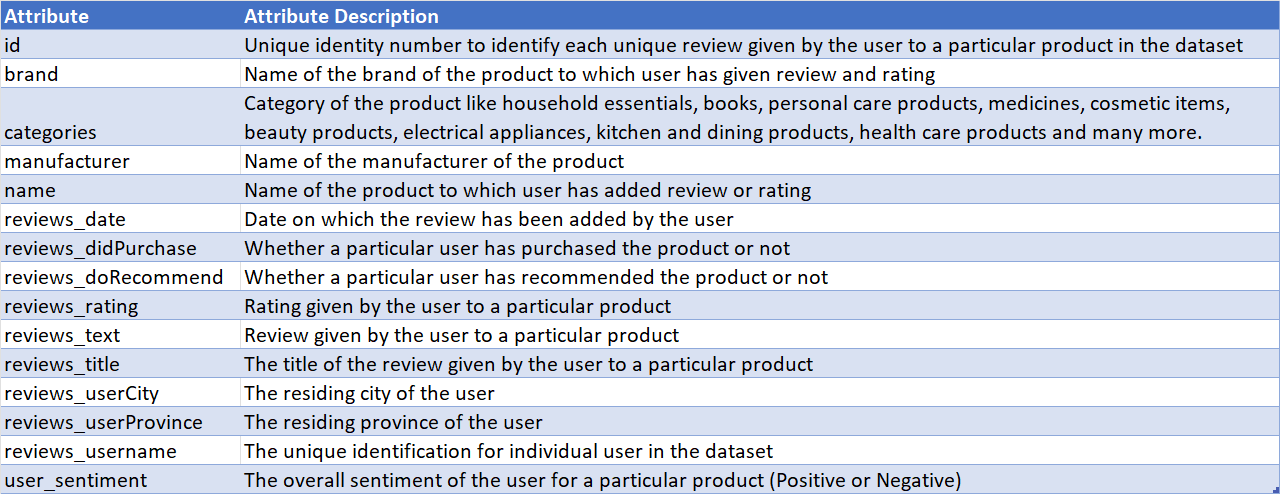

## Data Cleaning

### Handling NULL values

In [8]:
# Getting total number of NULL values and NULL percentage of the columns
null_data = pd.DataFrame({
    'MV_Count': df_reviews.isnull().sum(),  # Count of NULL values
    'MV_Percentage': (df_reviews.isnull().sum() * 100 / len(df_reviews)),  # Percentage of NULL values
})

# Sorting the DataFrame by MV_Count in descending order
null_data = null_data[null_data['MV_Count'] > 0].sort_values(by='MV_Count', ascending=False)
null_data

,MV_Count,MV_Percentage
reviews_userProvince,29830,9.94e+01
reviews_userCity,28071,9.36e+01
reviews_didPurchase,14068,4.69e+01
reviews_doRecommend,2570,8.57e+00
reviews_title,190,6.33e-01
manufacturer,141,4.70e-01
reviews_username,63,2.10e-01
reviews_date,46,1.53e-01
user_sentiment,1,3.33e-03


**Observations:**
1. `reviews_userProvince` and `reviews_userCity` have over 93% NULL values and are not useful for analysis. We will remove them from the dataset.
2. `reviews_didPurchase` column has over 46% NULL values. This field is not useful in building either Sentiment/Recommender system as well and will be removed.



### Removing `reviews_userProvince`, `reviews_userCity` and `reviews_didPurchase` from the dataset

In [9]:
df_clean = df_reviews.copy() #making copy of our dataframe

In [10]:
df_clean.drop(columns=['reviews_userProvince','reviews_userCity','reviews_didPurchase'], inplace=True) #Dropping less important features

In [11]:
df_clean.shape

(30000, 12)

In [12]:
# Getting total number of NULL values and NULL percentage of the columns for df_clean
null_data_clean = pd.DataFrame({
    'MV_Count': df_clean.isnull().sum(),  # Count of NULL values
    'MV_Percentage': (df_clean.isnull().sum() * 100 / len(df_clean)),  # Percentage of NULL values
})

# Sorting the DataFrame by MV_Count in descending order
null_data_clean = null_data_clean[null_data_clean['MV_Count'] > 0].sort_values(by='MV_Count', ascending=False)


null_data=null_data_clean
null_data

,MV_Count,MV_Percentage
reviews_doRecommend,2570,8.57e+00
reviews_title,190,6.33e-01
manufacturer,141,4.70e-01
reviews_username,63,2.10e-01
reviews_date,46,1.53e-01
user_sentiment,1,3.33e-03


### Checking `reviews_doRecommend` column


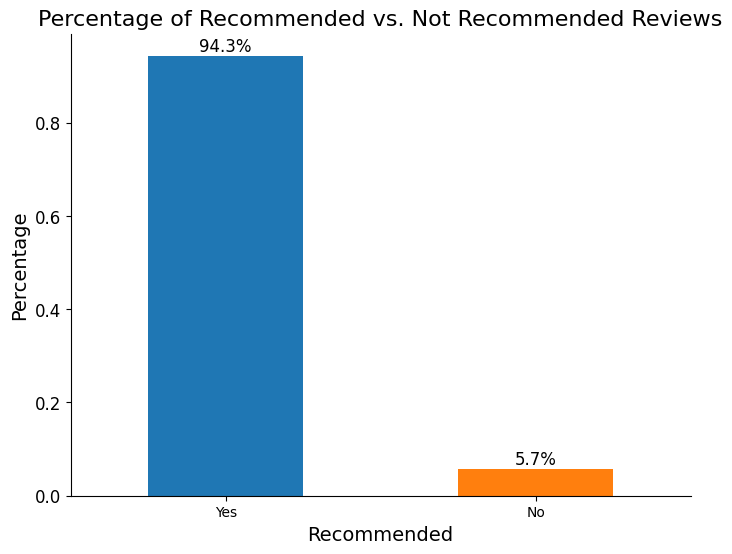

In [13]:
import matplotlib.pyplot as plt

# Customize the plot
plt.figure(figsize=(8, 6))  # Set the figure size
colors = ['#1f77b4', '#ff7f0e']  # Define colors for the bars

# Plot the bar chart
df_clean['reviews_doRecommend'].value_counts(normalize=True).plot(kind='bar', color=colors)

# Add title and labels
plt.title('Percentage of Recommended vs. Not Recommended Reviews', fontsize=16)
plt.xlabel('Recommended', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Add percentages above the bars
total = len(df_clean)
for i, val in enumerate(df_clean['reviews_doRecommend'].value_counts(normalize=True)):
    plt.text(i, val + 0.01, '{:.1f}%'.format(val * 100), ha='center', fontsize=12)

# Customize the ticks
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.yticks(fontsize=12)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

Looking at the distribution of `reviews_doRecommend` column, we can see that more than 94% of the data is having True value. Hence, the column does not provide any useful information for the model to learn. We will drop this field

In [14]:
df_clean.drop(columns=['reviews_doRecommend'], inplace=True)

In [15]:
# Checking NULLs again
null_data = pd.DataFrame({
    'MV_Count': df_clean.isnull().sum(),  # Count of NULL values
    'MV_Percentage': (df_clean.isnull().sum() * 100 / len(df_clean)),  # Percentage of NULL values
})

# Sorting the DataFrame by MV_Count in descending order
null_data = null_data[null_data['MV_Count'] > 0].sort_values(by='MV_Count', ascending=False)
null_data

,MV_Count,MV_Percentage
reviews_title,190,6.33e-01
manufacturer,141,4.70e-01
reviews_username,63,2.10e-01
reviews_date,46,1.53e-01
user_sentiment,1,3.33e-03


### Handling NULL values in `reviews_title`

This column is an important component for our analysis as it contains the title of the review given by the user to a particular product. Since the NULL percentage is only 0.633%, we will remove these rows from the dataset.

In [16]:
# Checking rowcount before deletion
df_clean.shape

(30000, 11)

In [17]:
df_clean = df_clean[~ df_clean.reviews_title.isna()]

In [18]:
# Checking rowcount post deletion
df_clean.shape

(29810, 11)

In [19]:
# Checking NULLs again
null_data = pd.DataFrame({
    'MV_Count': df_clean.isnull().sum(),  # Count of NULL values
    'MV_Percentage': (df_clean.isnull().sum() * 100 / len(df_clean)),  # Percentage of NULL values
})

# Sorting the DataFrame by MV_Count in descending order
null_data = null_data[null_data['MV_Count'] > 0].sort_values(by='MV_Count', ascending=False)
null_data

,MV_Count,MV_Percentage
manufacturer,141,4.73e-01
reviews_username,62,2.08e-01
reviews_date,46,1.54e-01
user_sentiment,1,3.35e-03


### Handling NULL values in `reviews_username`

This column is an important component for our analysis as it contains the unique identification for individual user in the dataset. Since the NULL percentage is only 0.20%, we will remove these rows from the dataset.

In [20]:
# Checking rowcount before deletion
df_clean.shape

(29810, 11)

In [21]:
df_clean = df_clean[~ df_clean.reviews_username.isna() ]

In [22]:
# Checking rowcount post deletion
df_clean.shape

(29748, 11)

In [23]:
# Checking NULLs again
# Checking NULLs again
null_data = pd.DataFrame({
    'MV_Count': df_clean.isnull().sum(),  # Count of NULL values
    'MV_Percentage': (df_clean.isnull().sum() * 100 / len(df_clean)),  # Percentage of NULL values
})

# Sorting the DataFrame by MV_Count in descending order
null_data = null_data[null_data['MV_Count'] > 0].sort_values(by='MV_Count', ascending=False)
null_data

,MV_Count,MV_Percentage
manufacturer,141,4.74e-01
reviews_date,40,1.34e-01
user_sentiment,1,3.36e-03


### Handling NULL values in `user_sentiment`

In [24]:
df_clean.user_sentiment.value_counts()

user_sentiment
Positive    26412
Negative     3335
Name: count, dtype: int64

In [25]:
df_clean[ df_clean.user_sentiment.isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),2014-11-07T00:00:00.000Z,5,my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the poin...,a super hit with my children. they loved it!!??,7.87E+11,NaN


- As there is only one record with missing data for `user_sentiment`, we will read the record manually and update the value.
- From reading the review title and rating, we can see that the overall sentiment is positive. So, we will update the value as `Positive` for this particular record with NaN.

In [26]:
df_clean[ df_clean.user_sentiment.isna()].user_sentiment

28354    NaN
Name: user_sentiment, dtype: object

In [27]:
df_clean.user_sentiment.fillna('Positive', inplace=True)

As the columns `manufacturer` and `reviews_date` are not needed for both Sentiment and Recommender models we don't need to handle the NULL values for them.

In [28]:
#map the categorical user_sentiment to numerical 1 or 0 for modelling
df_clean['user_sentiment'] = df_clean['user_sentiment'].map({'Positive':1,'Negative':0})

## Analysis

### Checking Distribution of `reviews_rating` column

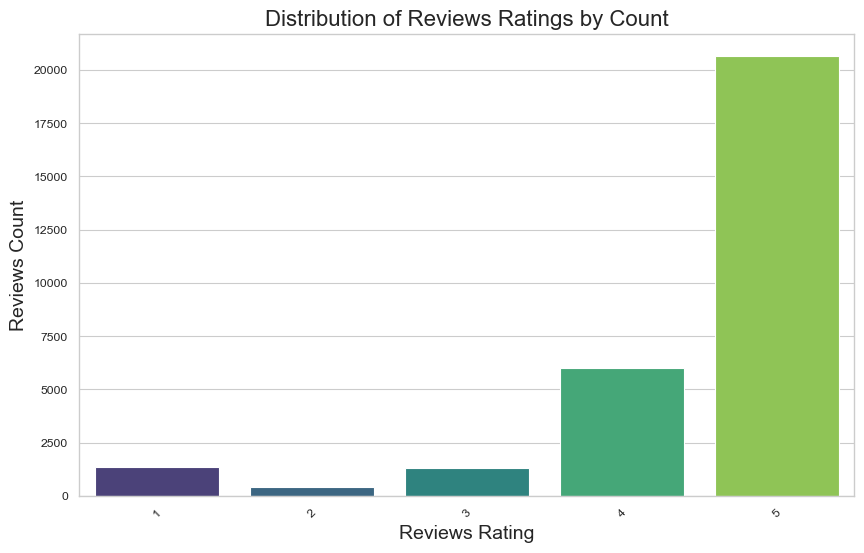

In [29]:
# Set the style and context of seaborn plots
sns.set_style("whitegrid")
sns.set_context("paper")

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='reviews_rating', data=df_clean, palette='viridis')

# Set title and labels
ax.set_title("Distribution of Reviews Ratings by Count", fontsize=16)
ax.set_xlabel("Reviews Rating", fontsize=14)
ax.set_ylabel("Reviews Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

Most of the ratings from the users have been on the higher side. Most of the review ratings have been 5. This would surely cause a data imbalance as user_sentiment should be in alignment with the ratings. We will check and handle it later on.

In [30]:
df_clean[df_clean["user_sentiment"]==1]["reviews_rating"].describe()

count    26413.00
mean         4.56
std          0.86
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: reviews_rating, dtype: float64

In [31]:
df_clean[df_clean["user_sentiment"]==0]["reviews_rating"].describe()

count    3335.00
mean        3.88
std         1.53
min         1.00
25%         3.00
50%         5.00
75%         5.00
max         5.00
Name: reviews_rating, dtype: float64

In [32]:
df_clean[(df_clean["user_sentiment"]==1) & (df_clean["reviews_rating"]<4)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund,1
11,Waste of Money,Purchased this thinking it would have some sort of warming effect but it's the same as the original. Don't waste your money.,1
14,Disappointed,First time purchase of this type of product. Maybe I expected too much. Did not think there was any warming feeling at all. Left us sticky! Even after trying to was it off.,1
18,Pretty nice,"I bought this because it had better reviews than the his and hers jelly, but I feel like it didn't work that well for us. It was kind of warm-feeling, but that's about it. I guess I don't know what's supposed to happen! Lol",3
54,New formula is terrible,"I used (and loved) this product for several years until they changed it. It used to moisturize my skin and left it feeling soft. Now, it sits on top of my skin and is never absorbed. It just leaves a slimy film on my skin. I will no longer purchase this product.",1
...,...,...,...
29050,Didn't Do Much For Dryness,"I received this product from Influenster. I absolutely love the whole system together, it made my hair oil-free for 48 hours. But I expected the conditioner to do more for the dryness at the ends of my hair like advertised. I didn't really notice much of a different in dryness before and after I...",3
29051,Not the best,"I used this product for a month straight before reviewing it and I'm not really all that impressed. My hair still gets pretty oily, my ends are still dry.... I mean it cleaned my hair I guess. It's nothing spectacular really. It didn't make my hair extremely soft but it didn't make my hair feel ...",3
29053,clay conditioning,Got this item as a compliment from influenster but it really made my hair smooth and shining after the usage. This review was collected as part of a promotion.,3
29054,Eh,"I am not in love with the conditioner. The clay mask and shampoo are GREAT but I didn't feel like this did anything for my ends. I would buy the other two, but not this, probably because I have fine hair and my ends need deep conditioning. Smells great though! I got this product free for testing...",3


In [33]:
df_clean[(df_clean["user_sentiment"]==0) & (df_clean["reviews_rating"]>3)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.,4
96,This product has made a real difference on my skin,In only a week I can see the difference in my skin on my face. This review was collected as part of a promotion.,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and supple after only two weeks. It absorbs well and leaves no residue. This review was collected as part of a promotion.,4
106,Very rich cream,"I like to use this cream on my neck and collarbone to help keep my skin well moisturized, but it can be a little heavy for the skin on my face This review was collected as part of a promotion.",4
117,Not greasy,"I finally found a moisturizing product that will absorb completely and not leave my skin feeling like it's suffocating. I apply it, and it feels like there is nothing there but my skin looks smoother. This review was collected as part of a promotion.",4
...,...,...,...
29818,Great Product,"I received a complimentary sample of this product and it worked so well for my hair! I have very thick hair so my roots always get oily and my ends are dry, this left my hair the cleanest it's felt in a long time. Will def recommend this to my family and friends! This review was collected as par...",5
29855,Great,This has prolonged the color in my hair! Not only is my hair healthier but I think I'll have to visit my stylist less! This review was collected as part of a promotion.,5
29858,Makes my hair soft and shiny without excess oil!,"This conditioner makes my hair very soft without weighing it down! I was afraid it'd make my roots more oily and weight them down, but it doesn't one bit! My hair is colored, and it hasn't faded out the color either! I'd highly recommend giving this a try! This review was collected as part of a ...",5
29862,Great Conditioner,This conditioner has become a staple in my hair regimen This review was collected as part of a promotion.,5


In [34]:
pd.crosstab(df_clean["user_sentiment"], df_clean["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,585,137,217,548,1848,3335
1,776,272,1115,5444,18806,26413
All,1361,409,1332,5992,20654,29748


### Clearly here is data anamoly so replace sentiments with true one
As per the above results, there looks to be mismtach between review_rating and user_sentiment. there are records that have higher user rating but user sentiment is negative and lower user rating but user sentiment is positive. We can either clean up those records or update the target column to the correct user sentiment, so that will be helpful for modelling. Here, updating the user_sentiment to 0 (but was 1) when the reviews_rating is less than 4, and updating the user_sentiment to 1(but was 0), when the reviews_rating is greater than or equal to 4

In [35]:
df_clean.loc[(df_clean['user_sentiment'] == 0) & (df_clean['reviews_rating'] > 3),'user_sentiment'] = 1
df_clean.loc[(df_clean['user_sentiment']==1) & (df_clean['reviews_rating'] < 4),'user_sentiment'] = 0

In [36]:
pd.crosstab(df_clean["user_sentiment"], df_clean["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1361,409,1332,0,0,3102
1,0,0,0,5992,20654,26646
All,1361,409,1332,5992,20654,29748


* from the above table, we can see that we don't have mismatch between the reviews_rating and user_sentiment

### Checking Top 5 Brands with negative reviews

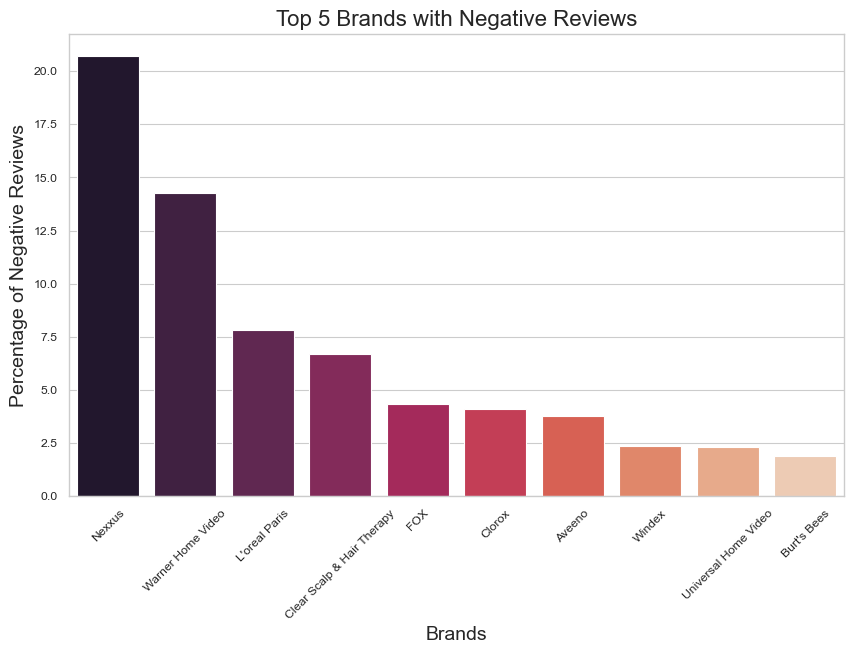

In [37]:
# Filter the DataFrame for negative user sentiment and calculate normalized value counts for the top 5 brands
top_negative_brands = df_clean[df_clean['user_sentiment'] == 0]['brand'].value_counts(normalize=True, ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_negative_brands.index, y=top_negative_brands.values * 100, palette='rocket')

# Set title and labels
plt.title("Top 5 Brands with Negative Reviews", fontsize=16)
plt.xlabel("Brands", fontsize=14)
plt.ylabel("Percentage of Negative Reviews", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

`Nexxus` is the product that is rated the most negative and nearly `21%` of the negative reviews have been towards `Nexxus`.

### Checking Top 5 Brands with positive reviews

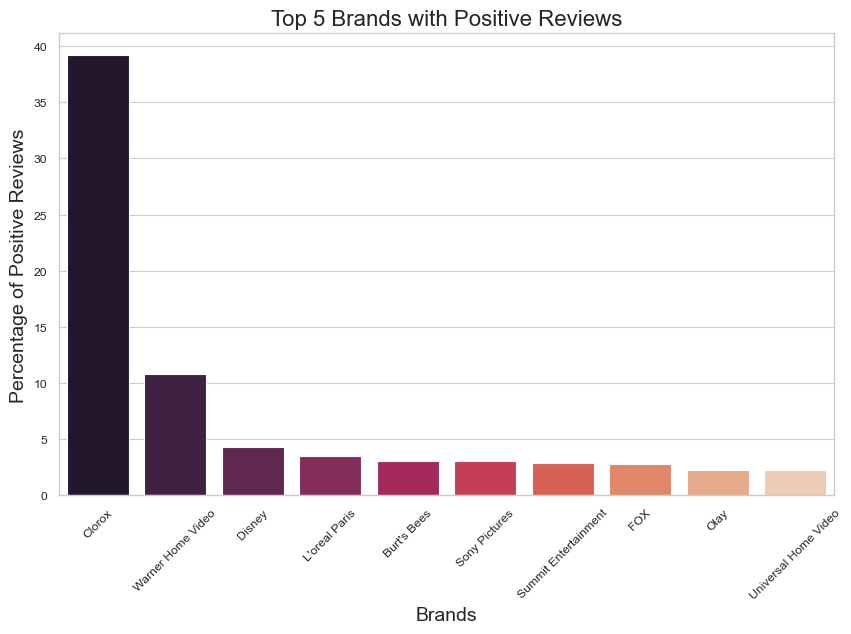

In [38]:
# Filter the DataFrame for negative user sentiment and calculate normalized value counts for the top 5 brands
top_positive_brands = df_clean[df_clean['user_sentiment'] == 1]['brand'].value_counts(normalize=True, ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_positive_brands.index, y=top_positive_brands.values * 100, palette='rocket')

# Set title and labels
plt.title("Top 5 Brands with Positive Reviews", fontsize=16)
plt.xlabel("Brands", fontsize=14)
plt.ylabel("Percentage of Positive Reviews", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [39]:
(df_clean.brand.value_counts(normalize=True)*100).head(5)

brand
Clorox               35.51
Warner Home Video    11.17
Disney                4.02
L'oreal Paris         3.99
FOX                   2.98
Name: proportion, dtype: float64

* Surprisingly `Clorox` is the product that is rated the most positive as well and more than 35% of the positive reviews have been towards `Clorox`.
* Checking the data, we realize that 35% of the brands for which we have the data is actually `Clorox` which is why it has the most reviews.

### Checking review counts based on the review year

In [40]:
# Before type conversion
df_clean.reviews_date.dtype

dtype('O')

- We will first convert `reviews_date` to date type.
- Then we will get the year component from the date.

In [41]:
df_clean['reviews_date'] = pd.to_datetime(df_clean['reviews_date'], errors='coerce')

In [42]:
# After type conversion
df_clean.reviews_date.dtype

datetime64[ns, UTC]

In [43]:
# Getting year component from date
df_clean.reviews_date.dt.year

0        2012.0
1        2017.0
2        2017.0
3        2016.0
4        2016.0
          ...  
29995    2017.0
29996    2017.0
29997    2017.0
29998    2017.0
29999    2017.0
Name: reviews_date, Length: 29748, dtype: float64

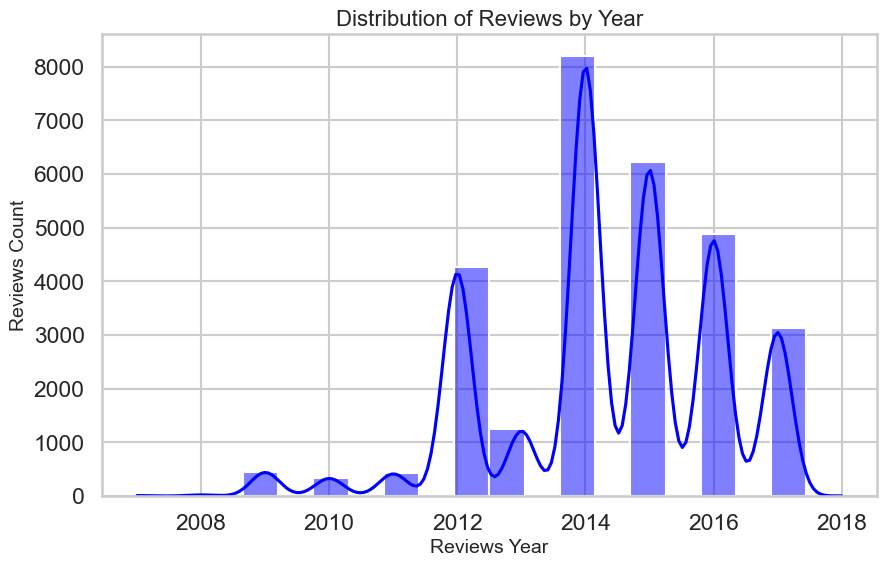

In [44]:
# Set the style and context of seaborn plots
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x=df_clean['reviews_date'].dt.year, kde=True, color='blue', bins=20)

# Set title and labels
plt.title("Distribution of Reviews by Year", fontsize=16)
plt.xlabel("Reviews Year", fontsize=14)
plt.ylabel("Reviews Count", fontsize=14)

# Show plot
plt.show()

### Checking Movie categories by Rating

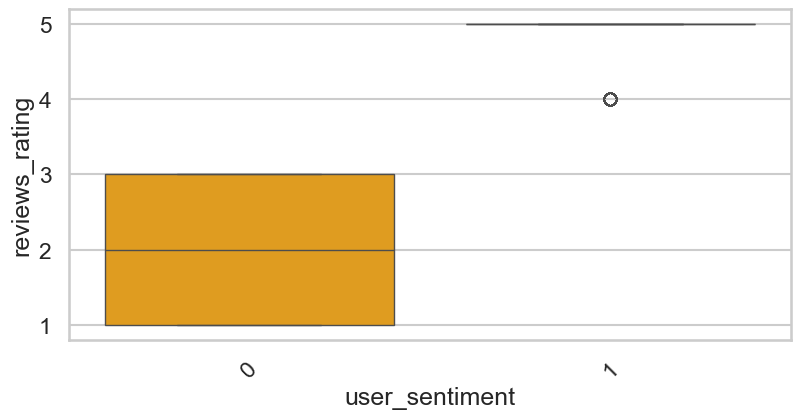

In [45]:
# Set the figure size
plt.figure(figsize=[10, 6])

# Create the box plot
sns.boxplot(data=df_clean, x='user_sentiment', y='reviews_rating', color='orange')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set tight layout to improve spacing
plt.tight_layout(pad=4)

# Show plot
plt.show()

## Type Conversion

Before we start the pre-processing steps, we need to make sure that all the text columns are converted to string type for future text operations.

In [46]:
# Get the list of column names that are not of integer type
non_integer_cols = df_clean.select_dtypes(exclude=['int']).columns

# Convert only non-integer columns to string
df_clean[non_integer_cols] = df_clean[non_integer_cols].astype(str)

# Pre-Processing

In [47]:
# Getting a copy of dataframe for pre-processing
df_prep = df_clean.copy()

## Combining reviews_text and reviews_title columns into reviews_combined and dropping the initial fields

In [48]:
df_prep['reviews_combined'] = df_prep['reviews_text'] + " " + df_prep['reviews_title']
df_prep.drop(columns=['reviews_text', 'reviews_title'], inplace=True)

In [49]:
df_prep.shape

(29748, 10)

In [50]:
df_prep.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_username,user_sentiment,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,5,joshua,1,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome


## Removing columns not-needed for analysis

In [51]:
df_prep.drop(columns=['categories', 'manufacturer', 'reviews_date'], inplace=True)

In [52]:
df_prep.head(1)

,id,brand,name,reviews_rating,reviews_username,user_sentiment,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,1,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome


## Creating dataframe for Sentiment analysis with only the required columns

In [53]:
df_sent = df_prep[['id','name','reviews_combined', 'user_sentiment']]

In [54]:
df_sent.shape

(29748, 4)

In [55]:
df_sent.head(2)

,id,name,reviews_combined,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome,1
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part of a promotion. Good,1


## Handling punctuations

In [56]:
import re

def clean_punctuation(sent):
    if isinstance(sent, str):  # Check if input is a string
        sent = sent.lower()  # Convert text to lowercase
        pattern = '[^\w\s]'  # Define pattern to remove punctuation
        sent = re.sub(pattern, '', sent)  # Remove punctuation
    return sent

In [57]:
df_sent['reviews_cleaned'] = df_sent['reviews_combined'].apply(clean_punctuation)

In [58]:
df_sent.head(2)

,id,name,reviews_combined,user_sentiment,reviews_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome,1,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy just awesome
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part of a promotion. Good,1,good flavor this review was collected as part of a promotion good


## Handling stopwords

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omshr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
stopwords_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [61]:
df_sent.head(2)

,id,name,reviews_combined,user_sentiment,reviews_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome,1,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy just awesome
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part of a promotion. Good,1,good flavor this review was collected as part of a promotion good


## Handling lemmatization

In [62]:
import spacy

# Assuming you have loaded the spaCy model
nlp = spacy.load('en_core_web_sm')

def clean_lemma(text):
    if isinstance(text, str):  # Check if input is a string
        sent = []
        doc = nlp(text)
        for token in doc:
            sent.append(token.lemma_)  # Lemmatize each token
        return " ".join(sent)  # Join lemmatized tokens into a single string
    else:
        return text  # Return non-string inputs as-is


In [63]:
df_sent['reviews_lemmatized'] = df_sent['reviews_cleaned'].apply(clean_lemma)

In [64]:
df_sent.head(2)

,id,name,reviews_combined,user_sentiment,reviews_cleaned,reviews_lemmatized
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome,1,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy just awesome,I love this album its very good more to the hip hop side than her current pop sound so hype I listen to this everyday at the gym I give it 5star rating all the way her metaphor be just crazy just awesome
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part of a promotion. Good,1,good flavor this review was collected as part of a promotion good,good flavor this review be collect as part of a promotion good


In [65]:
df_sent = df_sent[['id','name','reviews_lemmatized', 'user_sentiment']]

In [66]:
df_sent.head(2)

,id,name,reviews_lemmatized,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),I love this album its very good more to the hip hop side than her current pop sound so hype I listen to this everyday at the gym I give it 5star rating all the way her metaphor be just crazy just awesome,1
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor this review be collect as part of a promotion good,1


In [67]:
df_sent.shape

(29748, 4)

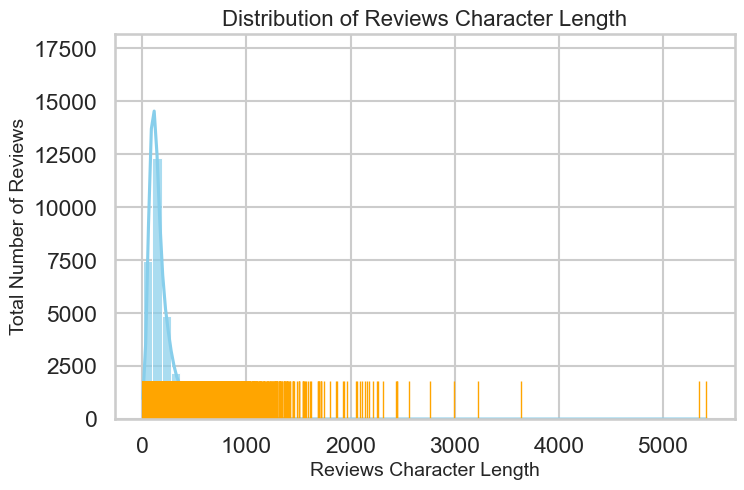

In [68]:
# Visualizing 'reviews_lemmatized' character length
character_length = [len(each_sent) for each_sent in df_sent['reviews_lemmatized']]

# Set the style and context of seaborn plots
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the histogram with rug plot
plt.figure(figsize=(8, 5))
sns.histplot(character_length, bins=60, kde=True, color='skyblue', alpha=0.7)
sns.rugplot(character_length, color='orange', height=0.1)

# Set title and labels
plt.title("Distribution of Reviews Character Length", fontsize=16)
plt.xlabel("Reviews Character Length", fontsize=14)
plt.ylabel("Total Number of Reviews", fontsize=14)

# Show plot
plt.show()

The distribution is a bit Right-skewed but it is a normal distribution.

In [69]:
# #Using a word cloud visualize the top 30 words in review by frequency
# from wordcloud import WordCloud
# stopwords_wordcloud = stopwords_set

# # Generate the word cloud
# wordcloud = WordCloud(max_font_size=80, max_words=100,
#                       background_color="white", colormap='viridis',
#                       random_state=42, stopwords=stopwords_wordcloud).generate(str(df_sent['reviews_lemmatized']))

# # Plot the word cloud
# plt.figure(figsize=[12, 8])
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.title("Word Cloud of Reviews", fontsize=16)
# plt.axis("off")
# plt.show()

# Feature Extraction

In this part, we will be performing
1. Feature Extraction using TF-IDF
2. Check for and handle Class imbalance
3. Perform train, test split

## TF-IDF Feature Extraction

**Feature Extraction using TF-IDF**
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 5 means "ignore terms that appear in less than 5 complaints"

In [70]:
# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, max_df=0.95, stop_words='english', ngram_range=(1,2))

In [71]:
X = tfidf.fit_transform(df_sent['reviews_lemmatized'])
y= df_sent['user_sentiment']

## WORD-2-VEC Feature Extraction

**Feature Extraction using WORD2VEC**
Convert the raw texts to a dense vector of `embedding` features

In [72]:
import tensorflow as tf
import tensorflow_hub as hub

In [74]:
import tensorflow_hub as hub

# Load the Universal Sentence Encoder model
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)

In [75]:
# Function to get embeddings for a single sentence
def get_use_embeddings(text):
    embeddings = model([text])
    return embeddings.numpy().flatten()  # Flatten to a 1D array

# Apply the function to the column and store the vectors in a new column
df_sent['embedding'] = df_sent['reviews_lemmatized'].apply(get_use_embeddings)

In [76]:
# Convert the embeddings column into a DataFrame with each dimension as a separate column
embedding_df = pd.DataFrame(df_sent['embedding'].tolist(), index=df_sent.index)

In [77]:
embedding_df.shape

(29748, 512)

In [78]:
df_sent.head(1)

,id,name,reviews_lemmatized,user_sentiment,embedding
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),I love this album its very good more to the hip hop side than her current pop sound so hype I listen to this everyday at the gym I give it 5star rating all the way her metaphor be just crazy just awesome,1,"[-0.009621045, 0.025122823, 0.091407746, 0.010238634, -0.017827908, 0.06262736, 0.058974996, 0.0349995, 0.060399868, 0.026325189, 0.01296048, -0.02454838, -0.008042547, -0.018086685, 0.003913795, 0.0023577393, 0.051128894, -0.037749037, 0.01375917, 0.011710825, 0.014595551, -0.0093949195, 0.0417..."


## Train, test split

In [79]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y, random_state=42, test_size=0.25)
X_train_wv, X_test_wv, y_train_wv, y_test_wv = train_test_split(embedding_df.to_numpy(), y, random_state=42, test_size=0.25)

In [80]:
print("Train shapes:", X_train_tf.shape)
print("Train WV shapes:", X_train_wv.shape)
print("Test shapes:", X_test_wv.shape)

Train shapes: (22311, 16044)
Train WV shapes: (22311, 512)
Test shapes: (7437, 512)


## Class Imbalance

In [81]:
# Check the data to see if there is a class imbalance in the data
df_sent['user_sentiment'].value_counts(normalize=True)*100

user_sentiment
1    89.57
0    10.43
Name: proportion, dtype: float64

# Visualize the data to see if there is a class imbalance in the data

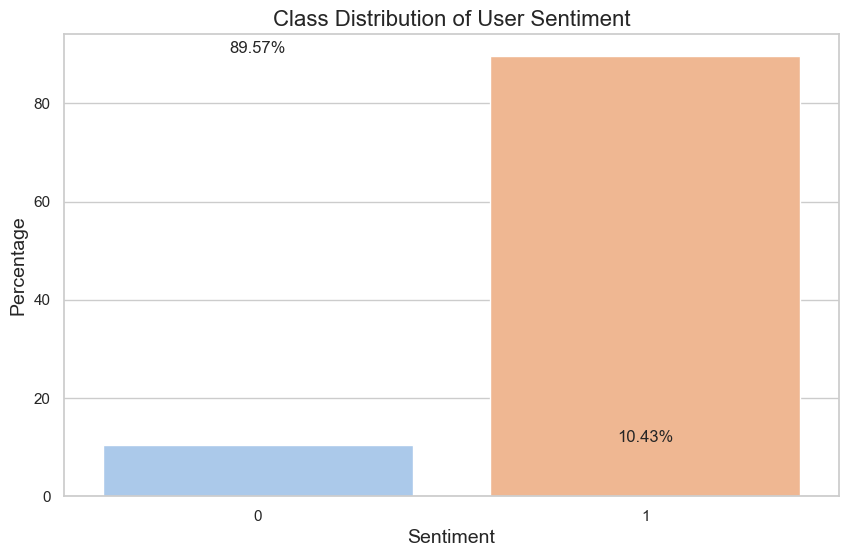

In [82]:
# Set the style and context of seaborn plots
sns.set_style("whitegrid")
sns.set_context("notebook")

# Get the value counts of user_sentiment column and calculate percentages
sentiment_counts = df_sent['user_sentiment'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')

# Add percentages as text on top of each bar
for i, value in enumerate(sentiment_counts):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title("Class Distribution of User Sentiment", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Percentage", fontsize=14)

# Show plot
plt.show()

In [83]:
df_sent.head(1)

,id,name,reviews_lemmatized,user_sentiment,embedding
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),I love this album its very good more to the hip hop side than her current pop sound so hype I listen to this everyday at the gym I give it 5star rating all the way her metaphor be just crazy just awesome,1,"[-0.009621045, 0.025122823, 0.091407746, 0.010238634, -0.017827908, 0.06262736, 0.058974996, 0.0349995, 0.060399868, 0.026325189, 0.01296048, -0.02454838, -0.008042547, -0.018086685, 0.003913795, 0.0023577393, 0.051128894, -0.037749037, 0.01375917, 0.011710825, 0.014595551, -0.0093949195, 0.0417..."


From the results above, we can concluded that there is a heavy class imbalance prevalent in the data.
> Positive sentiments make up *89%* of the data and Negative sentiments make up only *11%*

* We are going to handle the imbalance using a technique called SMOTE (Synthetic Minority Oversampling Technique)
* This is an oversampling method that generates synthetic samples for the minority class

In [84]:
# Before handling imbalance
before_counter_tf = y_train_tf.value_counts()
before_counter_wv = y_train_wv.value_counts()
print("Before handling imbalance for tf", before_counter_tf)
print("Before handling imbalance for wv", before_counter_tf)

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_tf_sm, y_train_tf_sm = smote.fit_resample(X_train_tf, y_train_tf)
X_train_wv_sm, y_train_wv_sm = smote.fit_resample(X_train_wv, y_train_wv)

# After handling imbalance
after_counter_tf = y_train_tf_sm.value_counts()
after_counter_wv = y_train_wv_sm.value_counts()
print("After handling imbalance for tf", after_counter_tf)
print("After handling imbalance for wv", after_counter_wv)

Before handling imbalance for tf user_sentiment
1    19967
0     2344
Name: count, dtype: int64
Before handling imbalance for wv user_sentiment
1    19967
0     2344
Name: count, dtype: int64
After handling imbalance for tf user_sentiment
1    19967
0    19967
Name: count, dtype: int64
After handling imbalance for wv user_sentiment
1    19967
0    19967
Name: count, dtype: int64


Looking at the record count we can see that both Positive and Negative sentiments now have equal number of rows.

# Model Building

We will be creating the following three ML models based on performance for predicting the sentiments based on the text and title of the reviews:
1. Logistic Regression
2. Random Forest
3. XGBoost
4. SVC
5. Ada-Boost
6. KNN

In [85]:
# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC" : SVC(),
    "Ada-boost" : AdaBoostClassifier(),
    "KNN" : KNeighborsClassifier(),
}
class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def train_model(self):
        self.model.fit(self.x_train, self.y_train)
        return self.model.predict(self.x_test)

    def evaluate_model(self, y_pred_class):

        # self.result_metrics = self.evaluate_metrics(y_pred_class)

        
        # # self.classification_report(y_pred_class)
        # print("*" * 30)
        # print("\n")
        # # self.confusion_matrix(y_pred_class)
        # print("*" * 30)
        # print("\n")
        
        self.plot_roc_curve()
        
        # return self.result_metrics
    def evaluate_metrics(self, y_pred_class):
        print(f"Evaluating ==============> {self.model}")
        result_metrics = [] 
        accuracy = accuracy_score(self.y_test, y_pred_class)
        precision = precision_score(self.y_test, y_pred_class, average='weighted')
        recall = recall_score(self.y_test, y_pred_class, average='weighted')
        f1score = f1_score(self.y_test, y_pred_class, average='weighted')
        y_pred_prob = self.model.predict_proba(self.x_test)[:, 1]
        roc_auc = roc_auc_score(self.y_test, y_pred_prob)
                
        print(f"Accuracy: {accuracy * 100:.1f}%")
        print(f"Precision (weighted): {precision * 100:.1f}%")
        print(f"Recall (weighted): {recall * 100:.1f}%")
        print(f"F1 Score (weighted): {f1score * 100:.1f}%")
        print(f"ROC-AUC Score: {roc_auc * 100:.1f}%")
                
                # Create a DataFrame to store the metrics
        metrics_dict = {
                    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
                    str(self.model).split("(")[0]: [accuracy, precision, recall, f1score, roc_auc]
                }
        metrics_df = pd.DataFrame(metrics_dict)
                # Set the 'Metric' column as the index
        metrics_df.set_index('Metric', inplace=True)
                
        return metrics_df       

    def confusion_matrix(self, y_pred_class):
        print(f"Evaluating ========================> {self.model}")
        cm = confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(cm, labels=np.unique(self.y_test))

    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.figure(figsize=(8, 6))
        sns.heatmap(data / np.sum(data), annot=True, cmap="Blues", fmt=".2%", 
                    xticklabels=labels, yticklabels=labels)
        plt.title("Confusion Matrix")
        plt.ylabel("True Values")
        plt.xlabel("Predicted Values")
        plt.show()
        
    # def classification_report(self, y_pred_class):
    #     print(classification_report(self.y_test, y_pred_class, target_names=np.unique(self.y_test)))
    def classification_report(self, y_pred_class):
        target_names = [str(label) for label in np.unique(self.y_test)]
        print(classification_report(self.y_test, y_pred_class, target_names=target_names))
    
    def plot_roc_curve(self):
        print(f"Plotting ROC for =====================> {self.model}")
        y_pred_prob = self.model.predict_proba(self.x_test)[:, 1]
        fpr, tpr, _ = roc_curve(self.y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        plt.show()


## Using `Word-2-Vec(WV)`

Logistic regression

In [ ]:
base_logistic_wv = ModelBuilder(LogisticRegression(),X_train_wv_sm, X_test_wv, y_train_wv_sm, y_test_wv)
base_logistic_wv_pred=base_logistic_wv.train_model()

Evaluating ========================> LogisticRegression()


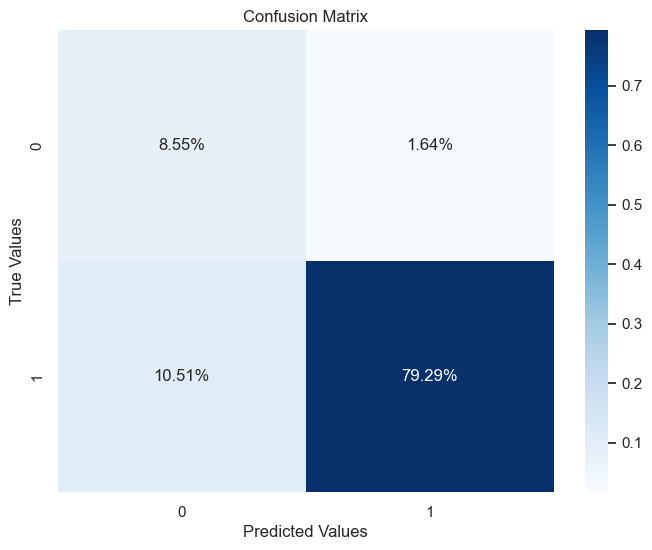

In [ ]:
base_logistic_wv.confusion_matrix(base_logistic_wv_pred)

In [ ]:
base_logistic_wv_report = base_logistic_wv.evaluate_metrics(base_logistic_wv_pred)
base_logistic_wv.evaluate_metrics(base_logistic_wv_pred)

Evaluating ==============> LogisticRegression()
Accuracy: 87.8%
Precision (weighted): 92.6%
Recall (weighted): 87.8%
F1 Score (weighted): 89.4%
ROC-AUC Score: 92.3%
Evaluating ==============> LogisticRegression()
Accuracy: 87.8%
Precision (weighted): 92.6%
Recall (weighted): 87.8%
F1 Score (weighted): 89.4%
ROC-AUC Score: 92.3%


,LogisticRegression
Metric,
Accuracy,0.88
Precision,0.93
Recall,0.88
F1 Score,0.89
ROC-AUC,0.92


In [ ]:
base_logistic_wv.classification_report(base_logistic_wv_pred)

              precision    recall  f1-score   support

           0       0.45      0.84      0.58       758
           1       0.98      0.88      0.93      6679

    accuracy                           0.88      7437
   macro avg       0.71      0.86      0.76      7437
weighted avg       0.93      0.88      0.89      7437



Plotting ROC for =====================> LogisticRegression()


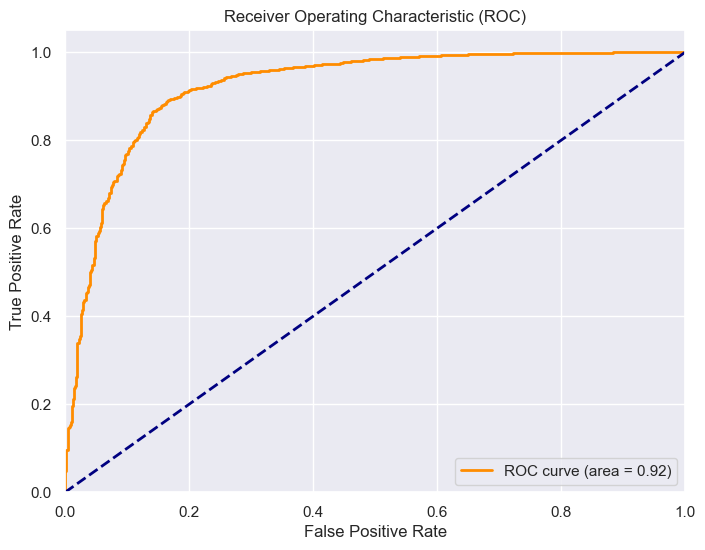

In [ ]:
base_logistic_wv.plot_roc_curve()

## For `Random Forest`

In [ ]:
base_rf_wv = ModelBuilder(RandomForestClassifier(),X_train_wv_sm, X_test_wv, y_train_wv_sm, y_test_wv)
base_rf_wv_pred = base_rf_wv.train_model()

Evaluating ========================> RandomForestClassifier()


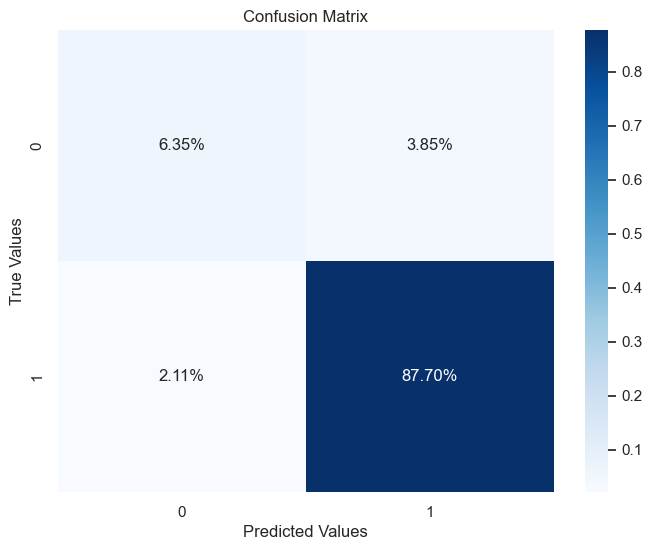

In [ ]:
# Generate and plot the confusion matrix
base_rf_wv.confusion_matrix(base_rf_wv_pred)

In [ ]:
base_rf_wv_report = base_rf_wv.evaluate_metrics(base_rf_wv_pred)
base_rf_wv.evaluate_metrics(base_rf_wv_pred)

Evaluating ==============> RandomForestClassifier()
Accuracy: 94.0%
Precision (weighted): 93.7%
Recall (weighted): 94.0%
F1 Score (weighted): 93.8%
ROC-AUC Score: 93.4%
Evaluating ==============> RandomForestClassifier()
Accuracy: 94.0%
Precision (weighted): 93.7%
Recall (weighted): 94.0%
F1 Score (weighted): 93.8%
ROC-AUC Score: 93.4%


,RandomForestClassifier
Metric,
Accuracy,0.94
Precision,0.94
Recall,0.94
F1 Score,0.94
ROC-AUC,0.93


In [ ]:
base_rf_wv.classification_report(base_rf_wv_pred)

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       758
           1       0.96      0.98      0.97      6679

    accuracy                           0.94      7437
   macro avg       0.85      0.80      0.82      7437
weighted avg       0.94      0.94      0.94      7437



Plotting ROC for =====================> RandomForestClassifier()


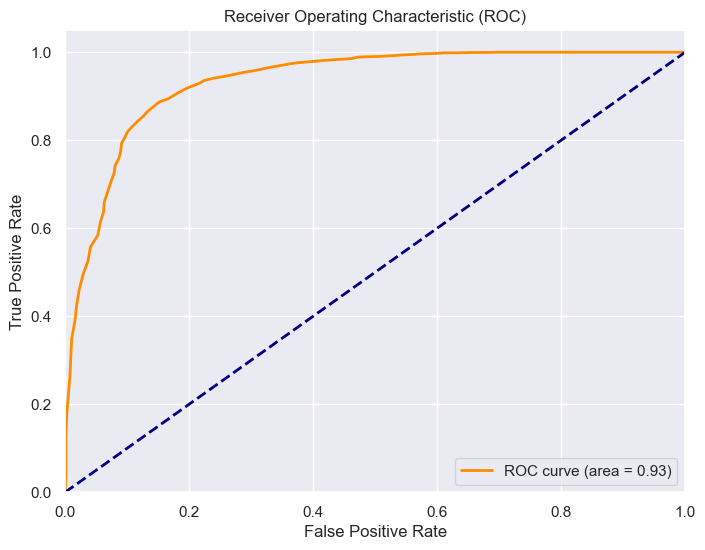

In [ ]:
base_rf_wv.plot_roc_curve()

## FOR `"XGBoost"`

In [ ]:
base_xg_wv = ModelBuilder(XGBClassifier(),X_train_wv_sm, X_test_wv, y_train_wv_sm, y_test_wv)
base_xg_wv_pred = base_xg_wv.train_model()

Evaluating ========================> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


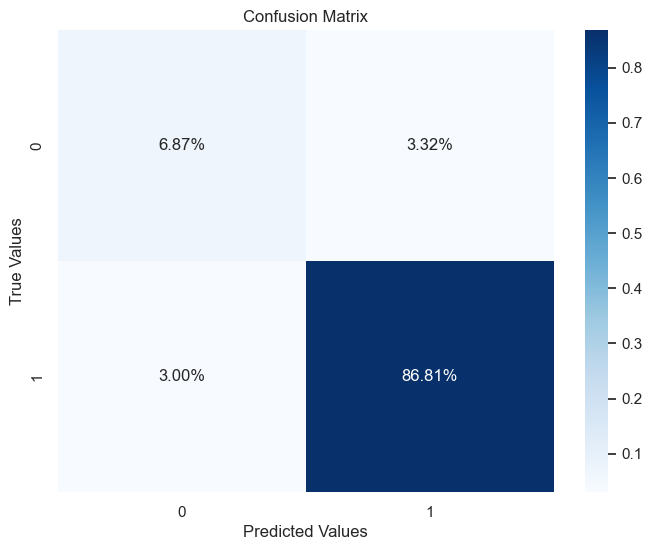

In [ ]:
# Generate and plot the confusion matrix
base_xg_wv.confusion_matrix(base_xg_wv_pred)

In [ ]:
base_xg_wv_report = base_xg_wv.evaluate_metrics(base_xg_wv_pred)
base_xg_wv.evaluate_metrics(base_xg_wv_pred)

Evaluating ==============> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 93.7%
Precision (weighted): 93.6%
Recall (weighted): 93.7%
F1 Score (weighted): 93.6%
ROC-AUC Score: 92.4%
Evaluating ==============> XGBClassifier(base_score=None, booster=None, callbacks=None,
          

,XGBClassifier
Metric,
Accuracy,0.94
Precision,0.94
Recall,0.94
F1 Score,0.94
ROC-AUC,0.92


In [ ]:
base_xg_wv.classification_report(base_xg_wv_pred)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       758
           1       0.96      0.97      0.96      6679

    accuracy                           0.94      7437
   macro avg       0.83      0.82      0.82      7437
weighted avg       0.94      0.94      0.94      7437



Plotting ROC for =====================> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


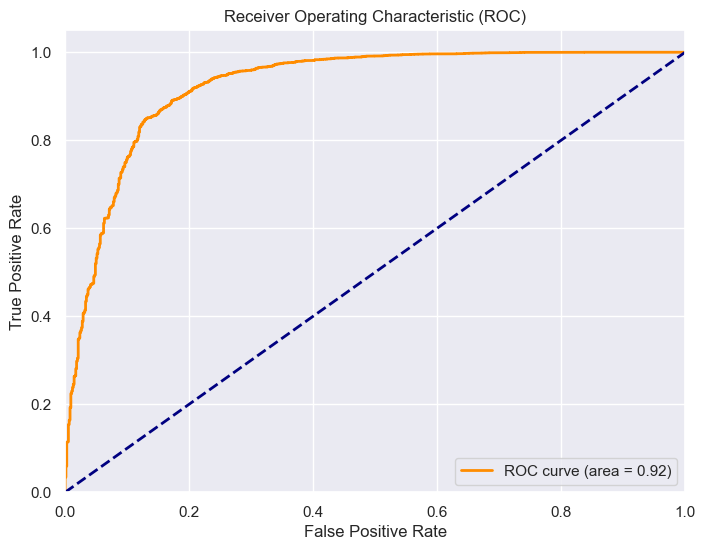

In [ ]:
base_xg_wv.plot_roc_curve()

## For `SVC`

In [ ]:
base_svc_wv = ModelBuilder(SVC(probability=True),X_train_wv_sm, X_test_wv, y_train_wv_sm, y_test_wv)
base_svc_wv_pred = base_svc_wv.train_model()

Evaluating ========================> SVC(probability=True)


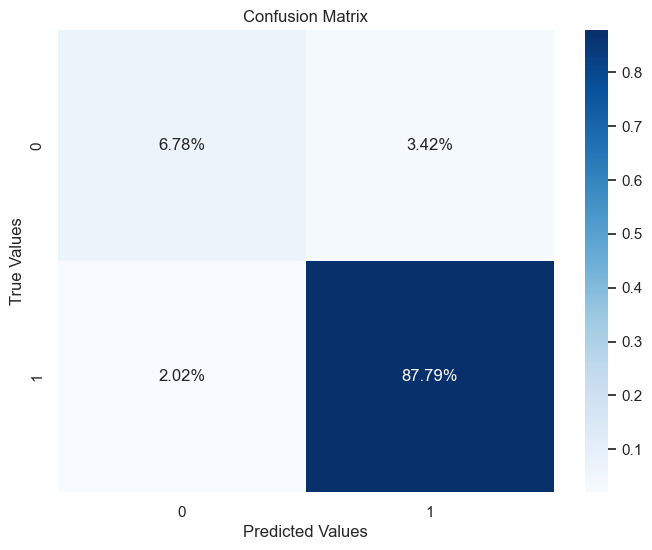

In [ ]:
# Generate and plot the confusion ]
base_svc_wv.confusion_matrix(base_svc_wv_pred)

In [ ]:
base_svc_wv_report = base_svc_wv.evaluate_metrics(base_svc_wv_pred)
base_svc_wv.evaluate_metrics(base_svc_wv_pred)

Evaluating ==============> SVC(probability=True)
Accuracy: 94.6%
Precision (weighted): 94.3%
Recall (weighted): 94.6%
F1 Score (weighted): 94.4%
ROC-AUC Score: 93.0%
Evaluating ==============> SVC(probability=True)
Accuracy: 94.6%
Precision (weighted): 94.3%
Recall (weighted): 94.6%
F1 Score (weighted): 94.4%
ROC-AUC Score: 93.0%


,SVC
Metric,
Accuracy,0.95
Precision,0.94
Recall,0.95
F1 Score,0.94
ROC-AUC,0.93


In [ ]:
base_svc_wv.classification_report(base_svc_wv_pred)

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       758
           1       0.96      0.98      0.97      6679

    accuracy                           0.95      7437
   macro avg       0.87      0.82      0.84      7437
weighted avg       0.94      0.95      0.94      7437



Plotting ROC for =====================> SVC(probability=True)


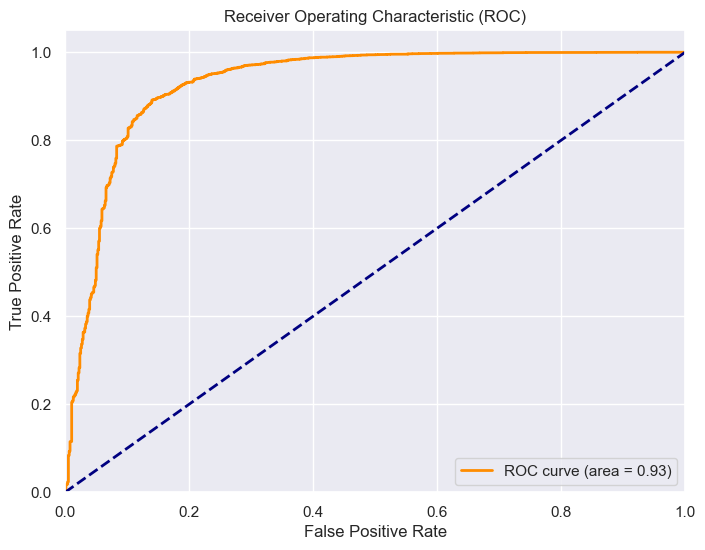

In [ ]:
base_svc_wv.plot_roc_curve()

## FOR `Ada-boost`

In [ ]:
base_ada_wv = ModelBuilder(AdaBoostClassifier(),X_train_wv_sm, X_test_wv, y_train_wv_sm, y_test_wv)
base_ada_wv_pred = base_ada_wv.train_model()

Evaluating ========================> AdaBoostClassifier()


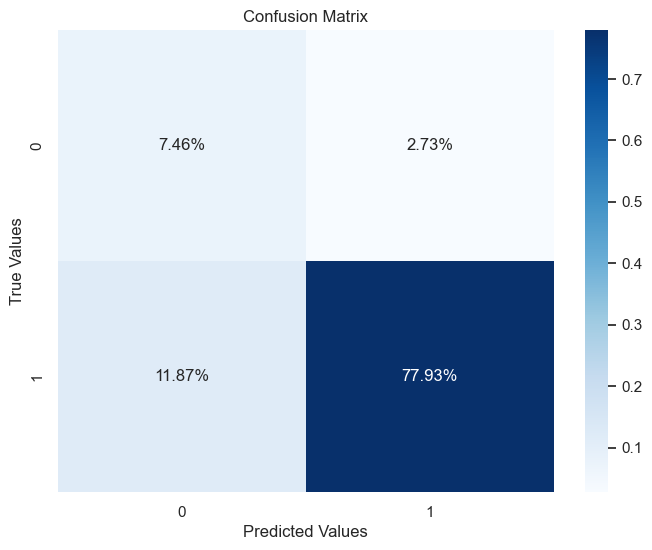

In [ ]:
base_ada_wv.confusion_matrix(base_ada_wv_pred)

In [ ]:
base_ada_wv_report = base_ada_wv.evaluate_metrics(base_ada_wv_pred)
base_ada_wv.evaluate_metrics(base_ada_wv_pred)

Evaluating ==============> AdaBoostClassifier()
Accuracy: 85.4%
Precision (weighted): 90.7%
Recall (weighted): 85.4%
F1 Score (weighted): 87.3%
ROC-AUC Score: 87.9%
Evaluating ==============> AdaBoostClassifier()
Accuracy: 85.4%
Precision (weighted): 90.7%
Recall (weighted): 85.4%
F1 Score (weighted): 87.3%
ROC-AUC Score: 87.9%


,AdaBoostClassifier
Metric,
Accuracy,0.85
Precision,0.91
Recall,0.85
F1 Score,0.87
ROC-AUC,0.88


In [ ]:
base_ada_wv.classification_report(base_ada_wv_pred)

              precision    recall  f1-score   support

           0       0.39      0.73      0.51       758
           1       0.97      0.87      0.91      6679

    accuracy                           0.85      7437
   macro avg       0.68      0.80      0.71      7437
weighted avg       0.91      0.85      0.87      7437



Plotting ROC for =====================> AdaBoostClassifier()


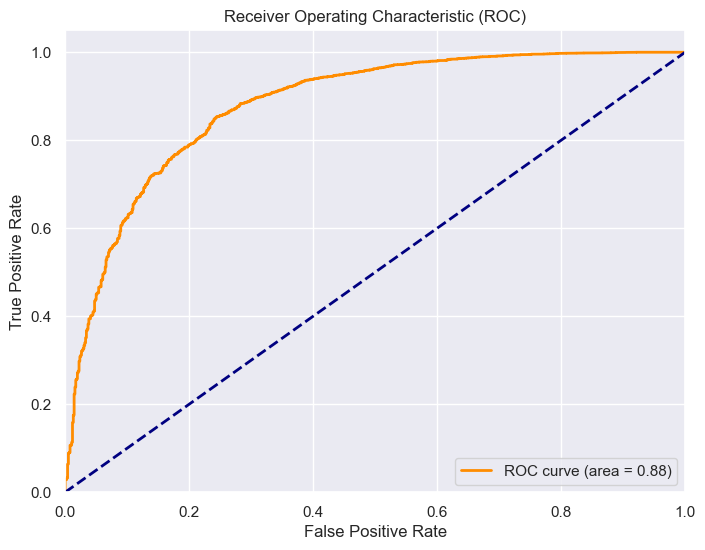

In [ ]:
base_ada_wv.plot_roc_curve()

## FOR `KNN`

In [ ]:
base_knn_wv = ModelBuilder(KNeighborsClassifier(),X_train_wv_sm, X_test_wv, y_train_wv_sm, y_test_wv)
base_knn_wv_pred = base_knn_wv.train_model()

Evaluating ========================> KNeighborsClassifier()


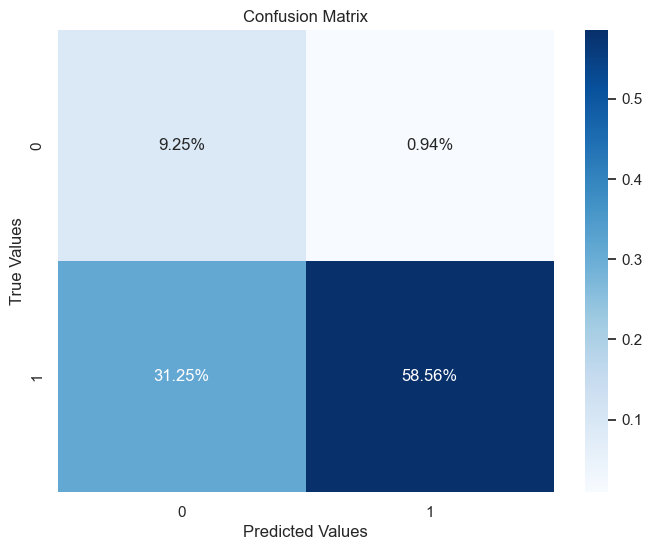

In [ ]:
base_knn_wv.confusion_matrix(base_knn_wv_pred)

In [ ]:
base_knn_wv_report =base_knn_wv.evaluate_metrics(base_knn_wv_pred)
base_knn_wv.evaluate_metrics(base_knn_wv_pred)

Evaluating ==============> KNeighborsClassifier()
Accuracy: 67.8%
Precision (weighted): 90.7%
Recall (weighted): 67.8%
F1 Score (weighted): 74.2%
ROC-AUC Score: 86.3%
Evaluating ==============> KNeighborsClassifier()
Accuracy: 67.8%
Precision (weighted): 90.7%
Recall (weighted): 67.8%
F1 Score (weighted): 74.2%
ROC-AUC Score: 86.3%


,KNeighborsClassifier
Metric,
Accuracy,0.68
Precision,0.91
Recall,0.68
F1 Score,0.74
ROC-AUC,0.86


In [ ]:
base_knn_wv.classification_report(base_knn_wv_pred)

              precision    recall  f1-score   support

           0       0.23      0.91      0.36       758
           1       0.98      0.65      0.78      6679

    accuracy                           0.68      7437
   macro avg       0.61      0.78      0.57      7437
weighted avg       0.91      0.68      0.74      7437



Plotting ROC for =====================> KNeighborsClassifier()


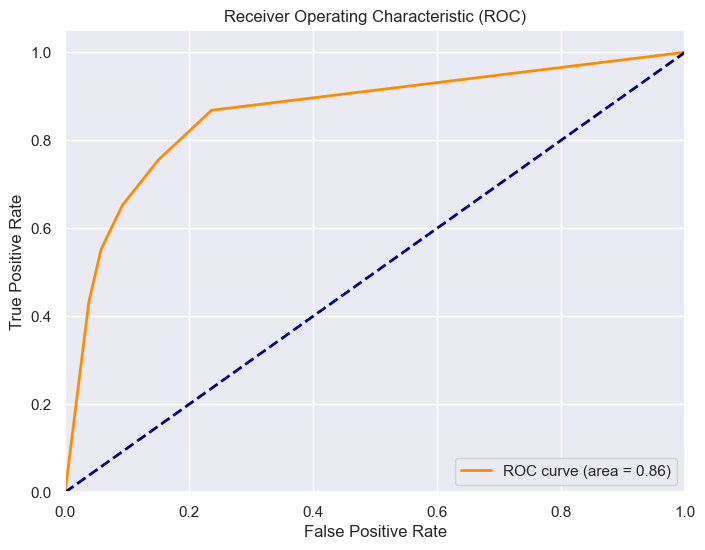

In [ ]:
base_knn_wv.plot_roc_curve()

***Overall comparision of all BASE models***

In [ ]:
final_perfomance_df_wv = pd.concat([base_logistic_wv_report, base_rf_wv_report, base_xg_wv_report, base_svc_wv_report, base_ada_wv_report,base_knn_wv_report], axis=1)

In [ ]:
final_perfomance_df_wv

,LogisticRegression,RandomForestClassifier,XGBClassifier,SVC,AdaBoostClassifier,KNeighborsClassifier
Metric,,,,,,
Accuracy,0.88,0.94,0.94,0.95,0.85,0.68
Precision,0.93,0.94,0.94,0.94,0.91,0.91
Recall,0.88,0.94,0.94,0.95,0.85,0.68
F1 Score,0.89,0.94,0.94,0.94,0.87,0.74
ROC-AUC,0.92,0.93,0.92,0.93,0.88,0.86


SVC base model performing better than all the other base models so we tune our svc model

`Tuning HyperParameters` of best base model SVC 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }

# # Initialize the SVM model
# svm = SVC()

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# # Fit GridSearchCV to your data
# grid_search.fit(X_train_wv_sm, y_train_wv_sm)

# # Get the best model and parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

KeyboardInterrupt: 

In [ ]:
base_tuned_svc_wv = ModelBuilder_tuning(X_train_wv_sm, X_test_wv, y_train_wv_sm, y_test_wv)
base_tuned_svc_wv_pred = base_tuned_svc_wv.train_model()



******************************
Evaluating ==============> SVC(probability=True)
Accuracy: 94.6%
Precision (weighted): 94.3%
Recall (weighted): 94.6%
F1 Score (weighted): 94.4%
ROC-AUC Score: 93.0%
******************************


              precision    recall  f1-score   support

           0       0.77      0.66      0.71       758
           1       0.96      0.98      0.97      6679

    accuracy                           0.95      7437
   macro avg       0.87      0.82      0.84      7437
weighted avg       0.94      0.95      0.94      7437

******************************


Evaluating ========================> SVC(probability=True)


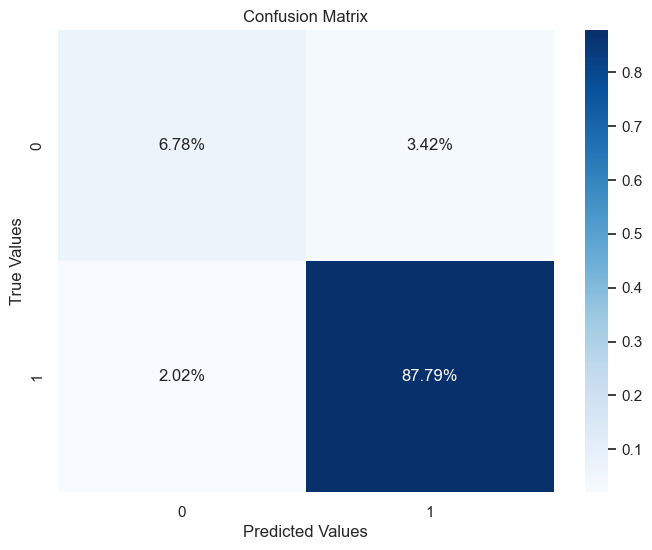

******************************


Plotting ROC for =====================> SVC(probability=True)


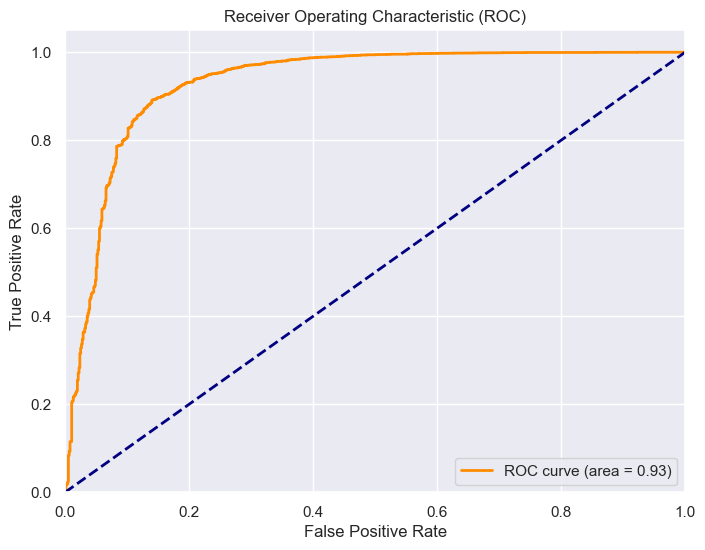



******************************
Evaluating ==============> SVC(probability=True)
Accuracy: 94.6%
Precision (weighted): 94.3%
Recall (weighted): 94.6%
F1 Score (weighted): 94.4%
ROC-AUC Score: 93.0%
******************************


              precision    recall  f1-score   support

           0       0.77      0.66      0.71       758
           1       0.96      0.98      0.97      6679

    accuracy                           0.95      7437
   macro avg       0.87      0.82      0.84      7437
weighted avg       0.94      0.95      0.94      7437

******************************


Evaluating ========================> SVC(probability=True)


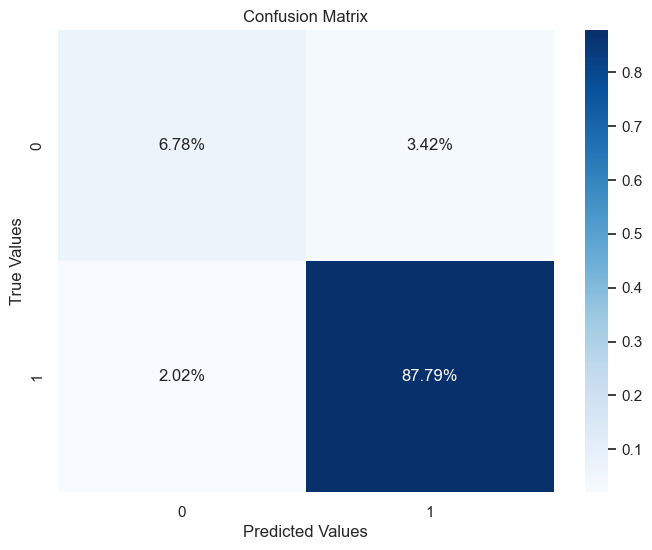

******************************


Plotting ROC for =====================> SVC(probability=True)


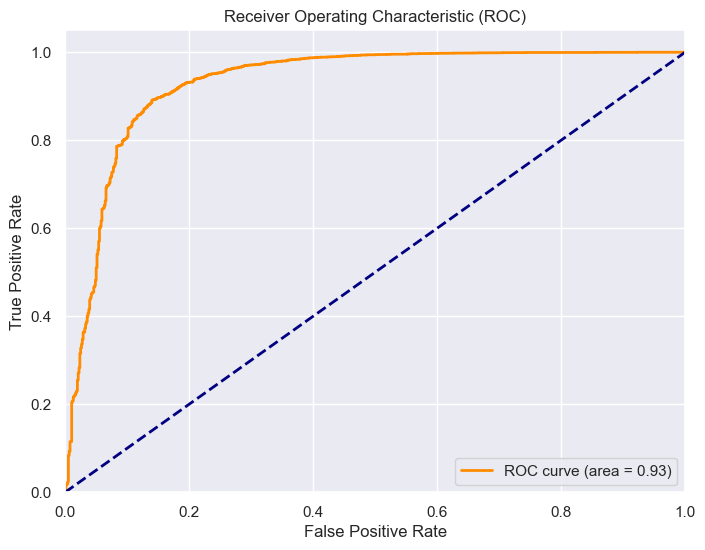

,SVC
Metric,
Accuracy,0.95
Precision,0.94
Recall,0.95
F1 Score,0.94
ROC-AUC,0.93


In [ ]:
base_tuned_svc_wv_report =base_tuned_svc_wv.evaluate_model(base_tuned_svc_wv_pred)
base_tuned_svc_wv.evaluate_model(base_tuned_svc_wv_pred)

Evaluating ========================> SVC(probability=True)


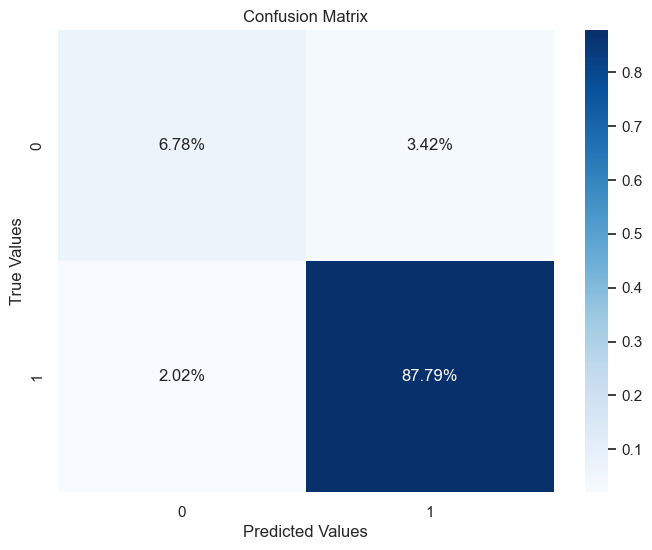

In [ ]:
base_tuned_svc_wv.confusion_matrix(base_tuned_svc_wv_pred)

In [ ]:
base_tuned_svc_wv.classification_report(base_tuned_svc_wv_pred)

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       758
           1       0.96      0.98      0.97      6679

    accuracy                           0.95      7437
   macro avg       0.87      0.82      0.84      7437
weighted avg       0.94      0.95      0.94      7437



Plotting ROC for =====================> SVC(probability=True)


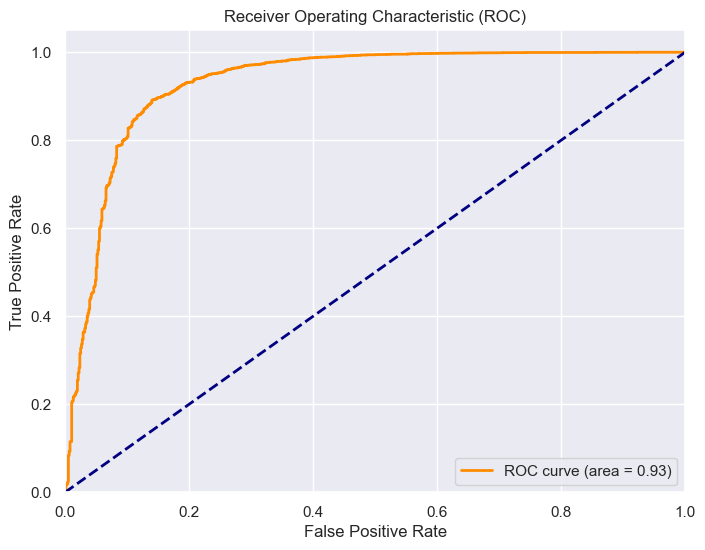

In [ ]:
base_tuned_svc_wv.plot_roc_curve()

In [ ]:
svc_both_comparision = pd.concat([base_tuned_svc_wv_report,base_svc_wv_report],axis = 1)

In [ ]:
svc_both_comparision

,SVC,Value
Metric,,
Accuracy,0.95,0.95
Precision,0.94,0.94
Recall,0.95,0.95
F1 Score,0.94,0.94
ROC-AUC,0.93,NaN


## USing `TF-IDF` 

Logistic regression

In [ ]:
base_logistic_tf = ModelBuilder(LogisticRegression(),X_train_tf_sm,X_test_tf,y_train_tf_sm,y_test_tf)
base_logistic_tf_pred = base_logistic_tf.train_model()

In [ ]:
base_logistic_tf_report=base_logistic_tf.evaluate_metrics(base_logistic_tf_pred)
base_logistic_tf.evaluate_metrics(base_logistic_tf_pred)

Evaluating ==============> LogisticRegression()
Accuracy: 91.2%
Precision (weighted): 93.0%
Recall (weighted): 91.2%
F1 Score (weighted): 91.9%
ROC-AUC Score: 92.8%
Evaluating ==============> LogisticRegression()
Accuracy: 91.2%
Precision (weighted): 93.0%
Recall (weighted): 91.2%
F1 Score (weighted): 91.9%
ROC-AUC Score: 92.8%


,LogisticRegression
Metric,
Accuracy,0.91
Precision,0.93
Recall,0.91
F1 Score,0.92
ROC-AUC,0.93


Evaluating ========================> LogisticRegression()


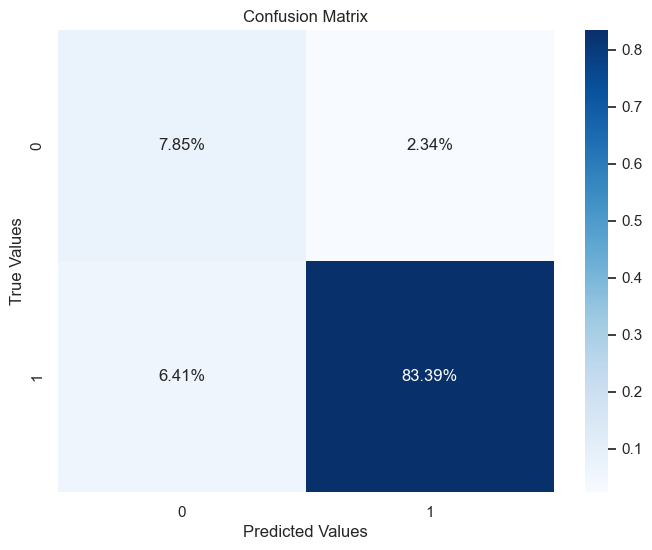

In [ ]:
base_logistic_tf.confusion_matrix(base_logistic_tf_pred)

In [ ]:
base_logistic_tf.classification_report(base_logistic_tf_pred)

              precision    recall  f1-score   support

           0       0.55      0.77      0.64       758
           1       0.97      0.93      0.95      6679

    accuracy                           0.91      7437
   macro avg       0.76      0.85      0.80      7437
weighted avg       0.93      0.91      0.92      7437



Plotting ROC for =====================> LogisticRegression()


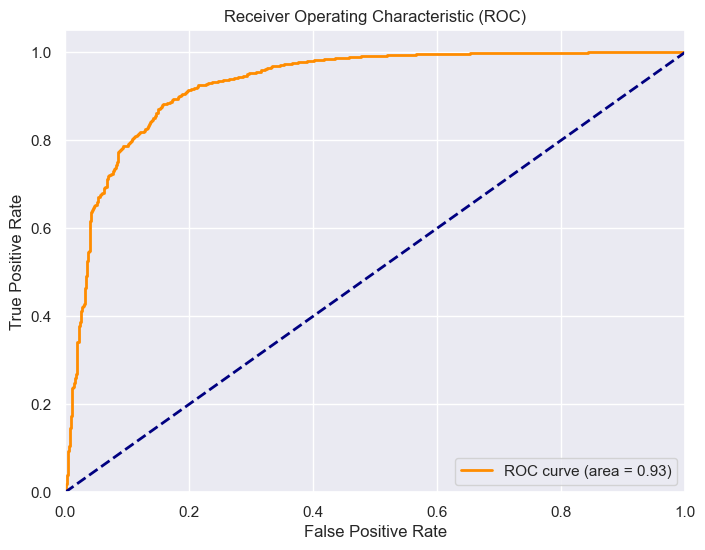

In [ ]:
base_logistic_tf.evaluate_model(base_logistic_tf_pred)

## For `"Random Forest"`

In [ ]:
base_rf_tf = ModelBuilder(RandomForestClassifier(),X_train_tf_sm,X_test_tf,y_train_tf_sm,y_test_tf)
base_rf_tf_pred = base_rf_tf.train_model()

In [ ]:
base_rf_tf_report=base_rf_tf.evaluate_metrics(base_lrf_tf_pred)
base_rf_tf.evaluate_metrics(base_lrf_tf_pred)

Evaluating ==============> RandomForestClassifier()
Accuracy: 93.7%
Precision (weighted): 93.3%
Recall (weighted): 93.7%
F1 Score (weighted): 93.4%
ROC-AUC Score: 91.2%
Evaluating ==============> RandomForestClassifier()
Accuracy: 93.7%
Precision (weighted): 93.3%
Recall (weighted): 93.7%
F1 Score (weighted): 93.4%
ROC-AUC Score: 91.2%


,RandomForestClassifier
Metric,
Accuracy,0.94
Precision,0.93
Recall,0.94
F1 Score,0.93
ROC-AUC,0.91


Evaluating ========================> RandomForestClassifier()


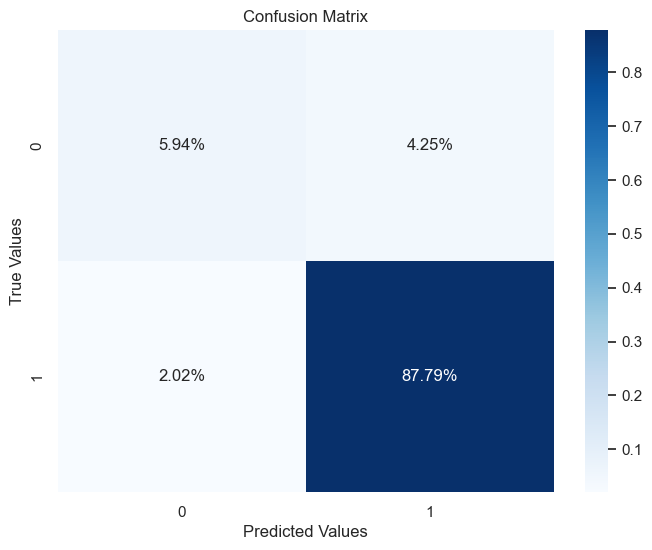

In [ ]:
base_rf_tf.confusion_matrix(base_lrf_tf_pred)

In [ ]:
base_rf_tf.classification_report(base_lrf_tf_pred)

              precision    recall  f1-score   support

           0       0.75      0.58      0.65       758
           1       0.95      0.98      0.97      6679

    accuracy                           0.94      7437
   macro avg       0.85      0.78      0.81      7437
weighted avg       0.93      0.94      0.93      7437



Plotting ROC for =====================> RandomForestClassifier()


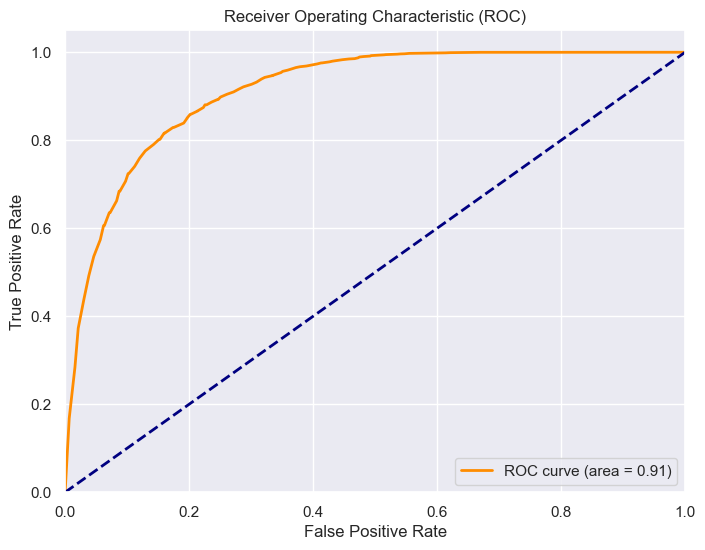

In [ ]:
base_rf_tf.evaluate_model(base_lrf_tf_pred)

## FOR `XG_BOOST`

In [ ]:
base_xg_tf = ModelBuilder(XGBClassifier(),X_train_tf_sm,X_test_tf,y_train_tf_sm,y_test_tf)
base_xg_tf_pred = base_xg_tf.train_model()

In [ ]:
base_xg_tf_report=base_rf_tf.evaluate_metrics(base_xg_tf_pred)
base_xg_tf.evaluate_metrics(base_xg_tf_pred)

Evaluating ==============> RandomForestClassifier()
Accuracy: 92.7%
Precision (weighted): 92.4%
Recall (weighted): 92.7%
F1 Score (weighted): 92.5%
ROC-AUC Score: 91.2%
Evaluating ==============> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 92.7%
Precision (weighted): 92.4%
Re

,XGBClassifier
Metric,
Accuracy,0.93
Precision,0.92
Recall,0.93
F1 Score,0.93
ROC-AUC,0.91


Evaluating ========================> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


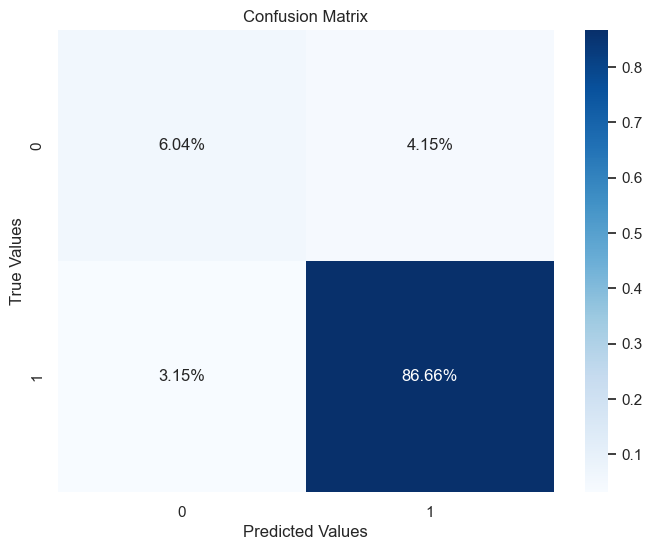

In [ ]:
base_xg_tf.confusion_matrix(base_xg_tf_pred)

In [ ]:
base_xg_tf.classification_report(base_xg_tf_pred)

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       758
           1       0.95      0.96      0.96      6679

    accuracy                           0.93      7437
   macro avg       0.81      0.78      0.79      7437
weighted avg       0.92      0.93      0.93      7437



Plotting ROC for =====================> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


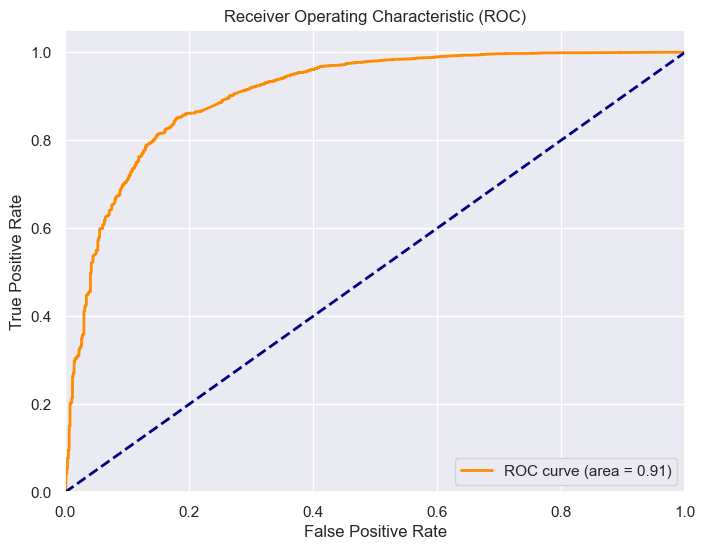

In [ ]:
base_xg_tf.evaluate_model(base_xg_tf_pred)

## FOR `SVC`

In [ ]:
base_svc_tf = ModelBuilder(SVC(probability=True),X_train_tf_sm,X_test_tf,y_train_tf_sm,y_test_tf)
base_svc_tf_pred = base_svc_tf.train_model()

In [ ]:
base_svc_tf_report=base_rf_tf.evaluate_metrics(base_svc_tf_pred)
base_svc_tf.evaluate_metrics(base_svc_tf_pred)

Evaluating ==============> RandomForestClassifier()
Accuracy: 94.6%
Precision (weighted): 94.5%
Recall (weighted): 94.6%
F1 Score (weighted): 94.0%
ROC-AUC Score: 91.2%
Evaluating ==============> SVC(probability=True)
Accuracy: 94.6%
Precision (weighted): 94.5%
Recall (weighted): 94.6%
F1 Score (weighted): 94.0%
ROC-AUC Score: 93.1%


,SVC
Metric,
Accuracy,0.95
Precision,0.95
Recall,0.95
F1 Score,0.94
ROC-AUC,0.93


Evaluating ========================> SVC(probability=True)


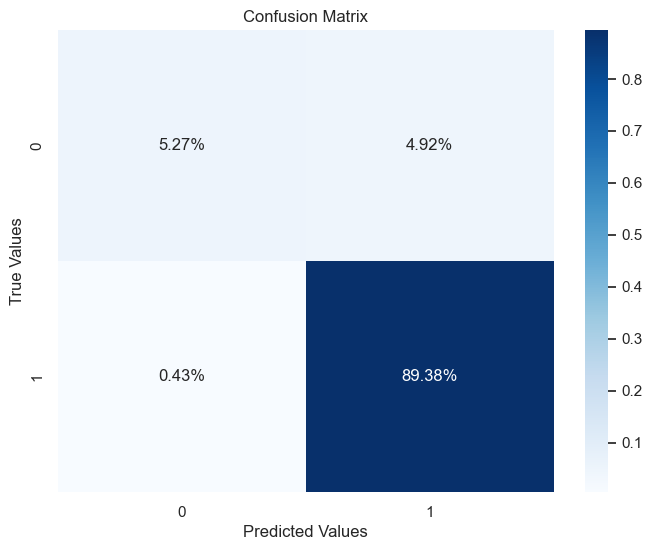

In [ ]:
base_svc_tf.confusion_matrix(base_svc_tf_pred)

In [ ]:
base_svc_tf.classification_report(base_svc_tf_pred)

              precision    recall  f1-score   support

           0       0.92      0.52      0.66       758
           1       0.95      1.00      0.97      6679

    accuracy                           0.95      7437
   macro avg       0.94      0.76      0.82      7437
weighted avg       0.95      0.95      0.94      7437



Plotting ROC for =====================> SVC(probability=True)


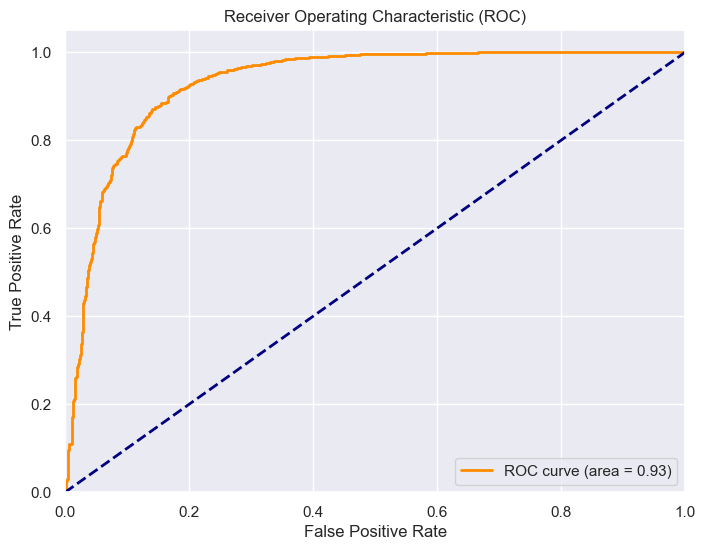

In [ ]:
base_svc_tf.evaluate_model(base_svc_tf_pred)

## FOR `"Ada-boost"`

In [ ]:
base_ada_tf = ModelBuilder(AdaBoostClassifier(),X_train_tf_sm,X_test_tf,y_train_tf_sm,y_test_tf)
base_ada_tf_pred = base_ada_tf.train_model()

In [ ]:
base_ada_tf_report = base_ada_tf.evaluate_metrics(base_ada_tf_pred)
base_ada_tf.evaluate_metrics(base_ada_tf_pred)

Evaluating ==============> AdaBoostClassifier()
Accuracy: 87.9%
Precision (weighted): 90.7%
Recall (weighted): 87.9%
F1 Score (weighted): 89.0%
ROC-AUC Score: 88.1%
Evaluating ==============> AdaBoostClassifier()
Accuracy: 87.9%
Precision (weighted): 90.7%
Recall (weighted): 87.9%
F1 Score (weighted): 89.0%
ROC-AUC Score: 88.1%


,AdaBoostClassifier
Metric,
Accuracy,0.88
Precision,0.91
Recall,0.88
F1 Score,0.89
ROC-AUC,0.88


Evaluating ========================> AdaBoostClassifier()


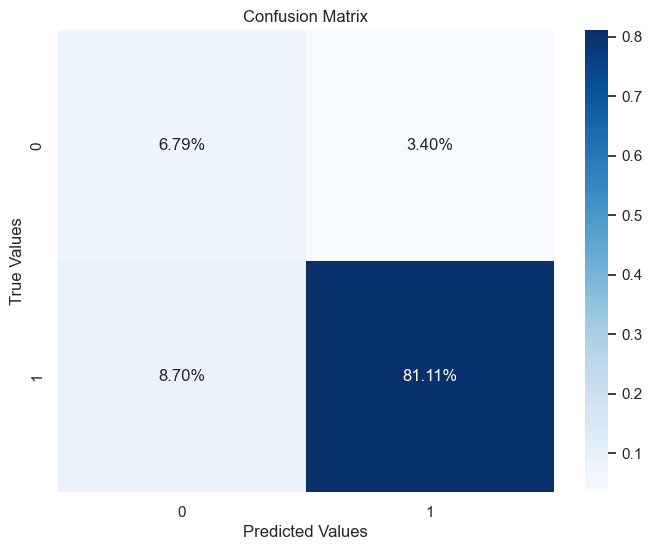

In [ ]:
base_ada_tf.confusion_matrix(base_ada_tf_pred)

In [ ]:
base_ada_tf.classification_report(base_ada_tf_pred)

              precision    recall  f1-score   support

           0       0.44      0.67      0.53       758
           1       0.96      0.90      0.93      6679

    accuracy                           0.88      7437
   macro avg       0.70      0.78      0.73      7437
weighted avg       0.91      0.88      0.89      7437



Plotting ROC for =====================> AdaBoostClassifier()


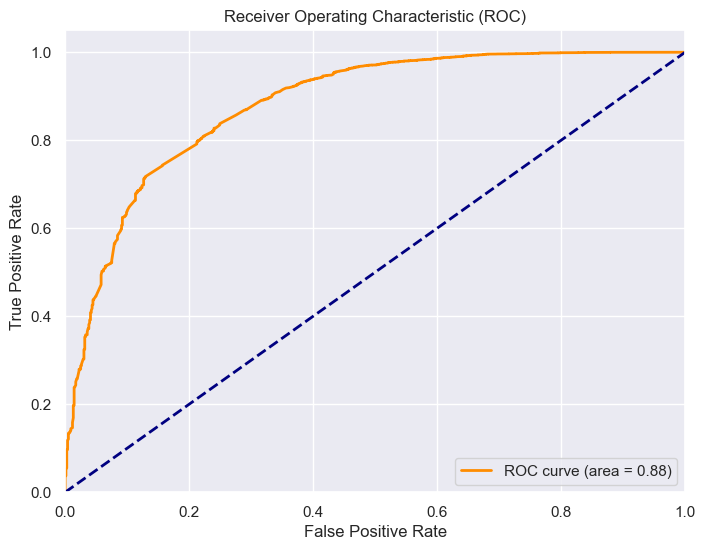

In [ ]:
base_ada_tf.evaluate_model(base_ada_tf_pred)

## FOR `KNN`

In [ ]:
base_knn_tf = ModelBuilder(KNeighborsClassifier(),X_train_tf_sm,X_test_tf,y_train_tf_sm,y_test_tf)
base_knn_tf_pred = base_knn_tf.train_model()

In [ ]:
base_knn_tf_report=base_knn_tf.evaluate_metrics(base_knn_tf_pred)
base_knn_tf.evaluate_metrics(base_knn_tf_pred)

Evaluating ==============> KNeighborsClassifier()
Accuracy: 44.4%
Precision (weighted): 89.7%
Recall (weighted): 44.4%
F1 Score (weighted): 52.6%
ROC-AUC Score: 77.9%
Evaluating ==============> KNeighborsClassifier()
Accuracy: 44.4%
Precision (weighted): 89.7%
Recall (weighted): 44.4%
F1 Score (weighted): 52.6%
ROC-AUC Score: 77.9%


,KNeighborsClassifier
Metric,
Accuracy,0.44
Precision,0.90
Recall,0.44
F1 Score,0.53
ROC-AUC,0.78


Evaluating ========================> KNeighborsClassifier()


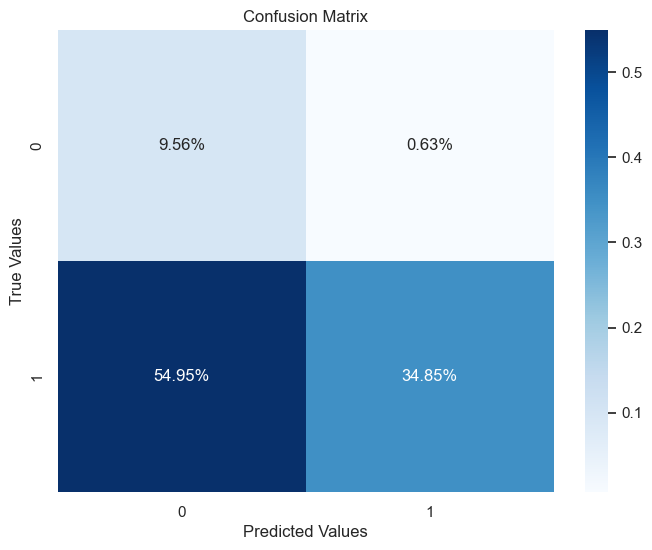

In [ ]:
base_knn_tf.confusion_matrix(base_knn_tf_pred)

In [ ]:
base_knn_tf.classification_report(base_knn_tf_pred)

              precision    recall  f1-score   support

           0       0.15      0.94      0.26       758
           1       0.98      0.39      0.56      6679

    accuracy                           0.44      7437
   macro avg       0.57      0.66      0.41      7437
weighted avg       0.90      0.44      0.53      7437



Plotting ROC for =====================> KNeighborsClassifier()


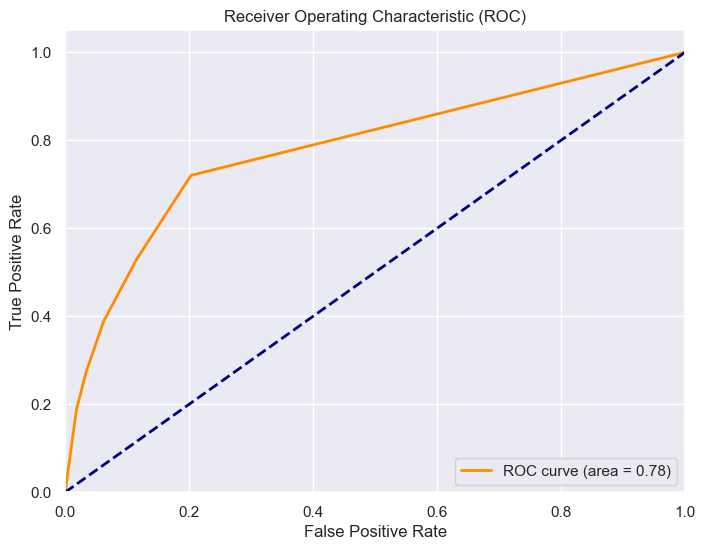

In [ ]:
base_knn_tf.evaluate_model(base_knn_tf_pred)

In [ ]:
final_perfomance_df_tf = pd.concat([base_logistic_tf_report, base_rf_tf_report, base_xg_tf_report, base_svc_tf_report, base_ada_tf_report,base_knn_tf_report], axis=1)

In [ ]:
final_perfomance_df_tf

,LogisticRegression,RandomForestClassifier,RandomForestClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier
Metric,,,,,,
Accuracy,0.91,0.94,0.93,0.95,0.88,0.44
Precision,0.93,0.93,0.92,0.95,0.91,0.90
Recall,0.91,0.94,0.93,0.95,0.88,0.44
F1 Score,0.92,0.93,0.93,0.94,0.89,0.53
ROC-AUC,0.93,0.91,0.91,0.91,0.88,0.78


`SVC base model` performing better than all the other base models so we tune our svc model

In [ ]:
pd.concat([base_svc_tf_report,base_svc_wv_report],axis=1)

,RandomForestClassifier,SVC
Metric,,
Accuracy,0.95,0.95
Precision,0.95,0.94
Recall,0.95,0.95
F1 Score,0.94,0.94
ROC-AUC,0.91,0.93


Tuning it

In [ ]:
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }

# # Initialize the SVM model
# svm = SVC()

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# # Fit GridSearchCV to your data
# grid_search.fit(X_train_tf_sm, y_train_tf_sm)

# # Get the best model and parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


Looking at the model evaluation metrics and focusing on Sensitivity, Specificity and F1 Score, we can conclude that the base Logistic Regression Model is the best model out of all of them.

## Saving the model

In [ ]:
import os
import pickle

def save_object(obj, filename):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    
    # Save the object
    with open(filename, 'wb') as file:
        pickle.dump(obj, file)

# Use the function to save objects
save_object(base_svc_wv.model, 'pickle/sentiment-classification-svc-model.pkl')
save_object(hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") , 'pickle/Embedding-model.pkl')
save_object(df_sent, 'pickle/cleaned-data.pkl')

# Building a Recommendation System

We will build the below two `colaborative filtering` based recommendation systems
1. User-based recommendation system
2. Item-based recommendation system

Once built, we will analyze the recommendation systems and select the one that is best suited in this case.
Once we get the best-suited recommendation system, the next task will be to recommend 20 products that a user is most likely to purchase based on the ratings.

## Import data

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [10]:
df_recommendation = df_reviews[["id", "name", "reviews_rating", "reviews_username"]]
df_recommendation.dropna(inplace=True)
calcMissingRowCount(df_recommendation)

id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64

## Train, Test Split

In [11]:
train, test = train_test_split(df_recommendation, test_size=0.25, random_state=42)

In [12]:
print(train.shape)
print(test.shape)

(22452, 4)
(7485, 4)


In [13]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"

In [14]:
# Convert the train ratings dataset into a matrix format where columns represent products and rows represent usernames
user_product_matrix = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

# Display the resulting matrix
user_product_matrix.sample(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mark thomas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ryan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ald80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mommyblue27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bybarry basden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating dummy train & dummy test dataset

- For the dummy train dataset, we will prepare it for predicting movies or products not yet rated by the user. Here, we will assign a value of 0 to movies already rated by the user to disregard them during prediction. Conversely, for movies not yet rated by the user, we will assign a value of 1 for prediction in the dummy train dataset.

- As for the dummy test dataset, it will be utilized for evaluation purposes. Specifically, we will solely conduct predictions on movies rated by the user. Therefore, in the dummy test dataset, movies rated by the user will be marked as 1, while movies not rated by the user will be assigned a value of 0. This approach serves as the inverse of the dummy train dataset.

This approach ensures that the dummy train and test datasets are appropriately structured for training and evaluating the recommendation system, respectively, while maintaining consistency and clarity in the data representation.

In [15]:
# makeing Copy of the train dataset into dummy_train
dummy_train = train.copy()

In [16]:
# The products not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [17]:
# Convert the dummy train dataset into matrix format
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a metric used to gauge the similarity between two vectors, which in this context, corresponds to the `reviews_rating` of different products.

**Adjusted Cosine**

Adjusted cosine similarity is an enhanced version of vector-based similarity that acknowledges the diversity in users' rating patterns. It takes into account the variability in users' rating tendencies, where some users may consistently rate items higher than others. To accommodate this variability, we normalize each user's ratings by subtracting their average rating across all products from each individual rating. This normalization process ensures that the similarity measure is more robust and reflective of users' relative preferences for different products.



## User Similarity Matrix (Using Adjusted Cosine)

### Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [18]:
# Pivot the train ratings' dataset into matrix format in which columns are Products and the rows are usernames.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [19]:
# For verification purpose, we do have cases where the rating is not NaN
df_pivot[~df_pivot['AV14LG0R-jtxr-f38QfS'].isna()]

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dorothy w,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_pivot.shape

(19431, 260)

### Normalising the rating of the product for each user around 0 mean

In [30]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T
df_subtracted.shape

(19431, 260)

In [22]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [23]:
from sklearn.metrics import pairwise_distances

In [24]:
# Fill NaN values with zeros before calculating pairwise distances
df_filled = df_subtracted.fillna(0)

# Calculate the User Similarity Matrix using cosine similarity
user_correlation = 1 - pairwise_distances(df_filled, metric='cosine')

# Fill NaN values (if any) with zeros in the resulting similarity matrix
user_correlation[np.isnan(user_correlation)] = 0

In [25]:
user_correlation.shape

(19431, 19431)

## Prediction - User User

Performing predictions for users who exhibit positive correlations with other users, while disregarding users with negative correlations, aligns with our objective of focusing on users who are more similar to the current users. Therefore, we will exclude correlations with values less than 0 in order to prioritize recommendations based on positive user similarities.

In [27]:
user_correlation[user_correlation<0]=0
user_correlation

(19431, 19431)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

The predicted rating provided by the user, encompassing both rated and unrated products, is computed as the weighted sum of the correlation between the user and the product ratings present in the rating dataset.

In [28]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0)) #prediction formu;la for collaborative filtering
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 1.46399891, 1.88982237,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [31]:
user_predicted_ratings.shape

(19431, 260)

As we are solely interested in products that have not been rated by the user, we will disregard products that have already been rated by the user by assigning them a rating of zero. This approach ensures that the predictions focus exclusively on unrated products.

In [66]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
print(user_final_rating.shape)
user_final_rating.head()

(19431, 260)


id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.7,0.0,0.0,0.0,0.27,2.58,1.02,0.0,0.0,0.0,0.0,0.0,1.02,0.0,0.0,0.0,0.0,0.0,0.0,1.08,0.0,0.0,...,0.63,2.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.62,0.0,2.5,0.0,0.0,0.55,1.67,0.19,0.0,0.0,0.0,0.0,0.0,1.46,1.89,0.2
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0



# Identifying the Top 10 Products Likely to be Purchased by a User Based on Ratings (User-User Based Recommendation)

In [64]:
# Take a sample username as input.
user_input = '00sab00'

In [65]:
top10_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:10]
df_top10_recommendations = pd.DataFrame({'Product Id': top10_recommendations.index, 'cosine_similarity_score' : top10_recommendations})
df_top10_recommendations.reset_index(drop=True, inplace=True)
df_top10_recommendations

,Product Id,cosine_similarity_score
0,AVpfPaoqLJeJML435Xk9,40.75
1,AVpfRTh1ilAPnD_xYic2,34.07
2,AVpf0eb2LJeJML43EVSt,14.24
3,AVpf2tw1ilAPnD_xjflC,13.72
4,AVpf3VOfilAPnD_xjpun,12.99
5,AVpfBrUZilAPnD_xTUly,9.96
6,AVpf385g1cnluZ0-s0_t,7.04
7,AVpfov9TLJeJML43A7B0,6.62
8,AVpfJP1C1cnluZ0-e3Xy,6.41
9,AVpfM_ytilAPnD_xXIJb,6.15


In [39]:
df_reco = df_reviews[['id','name','reviews_rating','reviews_username']]
df_reco = df_reco[~df_reco.reviews_username.isna()]

In [40]:
top20_rec = pd.merge(df_reco, df_top10_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
8,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,40.75
9,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),34.07
0,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),14.24
1,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),13.72
3,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,12.99
4,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Coverage",9.96
2,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",7.04
7,AVpfov9TLJeJML43A7B0,Bisquick Original Pancake And Baking Mix - 40oz,6.62
5,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,6.41
6,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,6.15


## Evaluation - User User

The evaluation process will remain consistent with the approach described earlier for predictions. The key distinction lies in assessing the performance of the recommendation system for products already rated by the user, rather than predicting ratings for unrated products. This evaluation entails comparing the predicted ratings with the actual ratings provided by the user for the rated products, allowing us to gauge the effectiveness and accuracy of the recommendation system.

In [41]:
train.sample(5)

,id,name,reviews_rating,reviews_username
3034,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),5,sister68
28455,AVpftikC1cnluZ0-p31V,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish",1,murdook
26784,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,5,rrh7329
25346,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,chrissy
11590,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,cleaner4


In [42]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1799, 4)

In [71]:
common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica
22577,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,4,at527
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar


In [98]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')
common_user_based_matrix

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,...,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85lisa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zebras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
common_user_based_matrix.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,...,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [75]:
user_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,19406,19407,19408,19409,19410,19411,19412,19413,19414,19415,19416,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426,19427,19428,19429,19430
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df_subtracted.head(1)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
user_correlation_df['userId'] = df_subtracted.index
user_correlation_df.set_index('userId',inplace=True)
user_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,19406,19407,19408,19409,19410,19411,19412,19413,19414,19415,19416,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426,19427,19428,19429,19430
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
common.head(1)

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica


In [82]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [83]:
user_correlation_df_1.shape

(1531, 19431)

In [84]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [85]:
user_correlation_df_3 = user_correlation_df_2.T

In [86]:
user_correlation_df_3.head()

,1234,1234567,123charlie,1witch,85lisa,a hutch,aac06002,aalyah,aaron,abcgator,abret,ac94,acg1,acjuarez08,aclass,adam,adizzione,adma2,adriana9999,ael26,afooey,afwifey2003,ah78,aj1135,ajay,...,wendy,wernigcourtney,weston t,wildchild23,wildman,willy,wimbly,wise,wjb1,wolfie,wolverine,woody,woowoo,wowiezowie,wren113,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
user_correlation_df_3.shape

(1531, 1531)

In [102]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
print(common_user_predicted_ratings.shape)
common_user_predicted_ratings

(1531, 129)


array([[0.        , 1.44337567, 0.        , ..., 0.        , 0.        ,
        1.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [89]:
common.head(2)

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica
22577,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,4,at527


In [90]:
# Creating dummy test dataframe
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [91]:
dummy_test.shape

(1531, 129)

In [92]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [93]:
common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,...,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Calculating the RMSE for only the products rated by user.
* For RMSE, normalising the rating to (1,5) range.

In [94]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [95]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [96]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

RMSE (Root Mean Square Error) for User-User recommendation system

In [108]:
rmse_user_user = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
mse_user_user = rmse_user_user ** 2
print(f"RMSE is ={rmse_user_user}\nMSE is ={mse_user_user}")

RMSE is =2.6027562241152595
MSE is =6.774339962170723


## Using Item Similarity

### Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different Product ID. In the user based similarity, we had taken mean for each user instead of each product.

In [ ]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

In [ ]:
df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123too,127726,12cass12,12gage,132457,...,zoeellasca,zoeyny,zombie,zombiedad80,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalizing the product rating for each product for using the Adujsted Cosine

In [ ]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [ ]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123too,127726,12cass12,12gage,132457,...,zoeellasca,zoeyny,zombie,zombiedad80,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [ ]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Prediction - Item Item

In [ ]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00603917, 0.06485571,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0094556 ],
       [0.        , 0.        , 0.        , ..., 0.00781596, 0.10809285,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756448]])

In [ ]:
item_predicted_ratings.shape

(18275, 256)

In [ ]:
dummy_train.shape

(18275, 256)

### Filtering the rating only for the products not rated by the user for recommendation

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.04e-03,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,8.18e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,...,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,5.14e-03,0.0,0.00e+00,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,2.05e-02,6.04e-03,0.06,0.00e+00
01impala,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,9.05e-04,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.10e-03,0.0,...,0.00e+00,2.99e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.92e-03,0.0,5.30e-03,0.0,0.0,0.00,0.0,0.10,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00,0.00e+00
02dakota,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,1.51e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.83e-03,0.0,...,0.00e+00,4.98e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.86e-03,0.0,8.84e-03,0.0,0.0,0.00,0.0,0.16,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00,0.00e+00
02deuce,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,1.21e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.46e-03,0.0,...,0.00e+00,3.98e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.89e-03,0.0,7.07e-03,0.0,0.0,0.00,0.0,0.13,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00,0.00e+00
0325home,0.0,0.0,0.0,8.22e-05,0.0,0.0,0.0,1.24e-03,2.20e-03,1.81e-03,0.0,0.0,0.0,0.0,7.39e-03,3.03e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.72e-03,0.0,...,5.10e-03,1.25e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.52e-03,0.0,2.77e-03,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,6.08e-03,0.00e+00,0.00,9.46e-03


In [ ]:
# Take a sample username as input.
user_input = '00sab00'

In [ ]:
item_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.04e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,8.18e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,5.14e-03,0.0,0.00e+00,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.02,6.04e-03,0.06,0.0
01impala,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.05e-04,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.10e-03,0.0,...,0.0,2.99e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.92e-03,0.0,5.30e-03,0.0,0.0,0.00,0.0,0.1,0.0,0.0,0.0,0.0,0.00,0.00e+00,0.00,0.0


In [ ]:
top20_item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_item_recommendations = pd.DataFrame({'Product Id': top20_item_recommendations.index, 'cosine_similarity_score' : top20_item_recommendations})
df_top20_item_recommendations.reset_index(drop=True, inplace=True)
df_top20_item_recommendations

,Product Id,cosine_similarity_score
0,AVpfE7puilAPnD_xUcCW,0.15
1,AVpfv4TlilAPnD_xhjNS,0.06
2,AVpfJcHuLJeJML433ZrY,0.05
3,AVpf0thK1cnluZ0-r8vR,0.04
4,AVpe6PCDLJeJML43yFQH,0.03
5,AVpe_dxlilAPnD_xSiHI,0.03
6,AVpfQtEm1cnluZ0-hUpe,0.03
7,AVpfHf4wLJeJML432vqK,0.02
8,AVpfthSailAPnD_xg3ON,0.02
9,AVpe6FfKilAPnD_xQmHi,0.02


## Finding the Top 20 products that a user is most likely to purchase based on the ratings (item-item based recommendation)

In [ ]:
top20_item_rec = pd.merge(df_reco, df_top20_item_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_item_rec.reset_index(drop=True, inplace=True)
top20_item_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
11,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,0.15
19,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter (cd),0.06
13,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),0.05
8,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),0.04
6,AVpe6PCDLJeJML43yFQH,Wagan Smartac 80watt Inverter With Usb,0.03
0,AVpe_dxlilAPnD_xSiHI,"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",0.03
17,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,0.03
12,AVpfHf4wLJeJML432vqK,Trend Lab Park Nursing Cover - Paisley,0.02
18,AVpfthSailAPnD_xg3ON,"Musselman Apple Sauce, Cinnamon, 48oz",0.02
4,AVpe6FfKilAPnD_xQmHi,Chex Muddy Buddies Brownie Supreme Snack Mix,0.02


## Evaluation - Item Item

Evaluation will we same as we have seen above for the prediction. The only difference being, we will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [ ]:
test.columns

Index(['id', 'name', 'reviews_rating', 'reviews_username'], dtype='object')

In [ ]:
# Find out the common products of test and train dataset.
common = test[test.id.isin(train.id)]
common.shape

(8966, 4)

In [ ]:
common.head(2)

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,ashleydale00


In [ ]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [ ]:
common_item_based_matrix.shape

(195, 8318)

In [ ]:
item_correlation_df = pd.DataFrame(item_correlation)

In [ ]:
item_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df['movieId'] = df_subtracted.index
item_correlation_df.set_index('movieId',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.47e-03,0.0,0.0,0.0,0.0,0.0,0.0,2.10e-03,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common.id.tolist()

In [ ]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [ ]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [ ]:
item_correlation_df_3.head(2)

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,...,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.47e-03,0.0,0.0,0.0,0.0,0.0,2.10e-03,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.34691174e-02, 3.00000000e+00, 6.62104097e-03, ...,
        0.00000000e+00, 5.16904870e-03, 8.22214474e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.45559849e-03]])

In [ ]:
common_item_predicted_ratings.shape

(195, 8318)

In [ ]:
common.head(2)

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,ashleydale00


In [ ]:
# Dummy test will be used for evaluation
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated are marked as 0 for evaluation

In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


c:\Users\omshr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning:

All-NaN slice encountered

c:\Users\omshr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning:

All-NaN slice encountered



In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

RMSE (Root Mean Square Error) for Item-Item recommendation system

In [ ]:
rmse_item_item = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_item_item)

3.548107989467506


c:\Users\omshr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



# Best-suited Recommendation model

* To get the best recommendation model, we will use RMSE (Root Mean Square Error) scores for both user-user and item-item based recommendation systems and do a comparison of the values.
* The recommendation model with the least RMSE will be selected as the best recommendation model.

In [ ]:
# Recommended model evaluation
if rmse_user_user < rmse_item_item:
  print("Best-fit model is user-user recommendation system")
else:
  print("Best-fit model is item-item recommendation system")

Best-fit model is user-user recommendation system


# Top 20 Product recommendations to the user by the best recommendation model (user-user based recommendation system)

In [ ]:
# Take a sample username as input
user_input = 'evrydayhustla420'

In [ ]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpfRTh1ilAPnD_xYic2,16.87
1,AVpe41TqilAPnD_xQH3d,13.02
2,AVpf0eb2LJeJML43EVSt,11.84
3,AVpf3VOfilAPnD_xjpun,9.61
4,AVpe59io1cnluZ0-ZgDU,7.71
5,AVpfJP1C1cnluZ0-e3Xy,5.47
6,AVpfOIrkilAPnD_xXgDG,4.81
7,AVpfPnrU1cnluZ0-g9rL,4.54
8,AVpe31o71cnluZ0-YrSD,4.34
9,AVpe8gsILJeJML43y6Ed,4.31


In [ ]:
top20_rec = pd.merge(df_reco, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
18,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),16.87
1,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),13.02
5,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),11.84
8,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,9.61
2,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),7.71
12,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5.47
15,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),4.81
17,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),4.54
0,AVpe31o71cnluZ0-YrSD,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),4.34
3,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",4.31


In [ ]:
user_final_rating.shape

(18275, 256)

In [ ]:
user_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.6,0.0,0.0,0.0,0.0,2.58,1.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.15,0.0,0.0,...,0.0,2.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.62,0.0,2.5,0.0,0.0,0.65,1.67,0.19,0.0,0.0,0.0,0.0,0.0,1.47,1.89,0.2
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0


# Fine-Tuning the Recommendation System and Recommendation of Top 5 Products

In [ ]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name):
  if user_name not in user_final_rating.index:
    print(f"The User {user_name} does not exist. Please provide a valid user name")
  else:
    # Get top 20 recommended products from the best recommendation model
    top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)

    # Get only the recommended products from the prepared dataframe "df_sent"
    df_top20_products = df_sent[df_sent.id.isin(top20_recommended_products)]

    # For these 20 products, get their user reviews and pass them through TF-IDF vectorizer to convert the data into suitable format for modeling
    X = tfidf.transform(df_top20_products["reviews_lemmatized"].values.astype(str))

    # Use the best sentiment model to predict the sentiment for these user reviews
    df_top20_products['predicted_sentiment'] = logreg.predict(X)

    # Create a new column to map Positive sentiment to 1 and Negative sentiment to 0. This will allow us to easily summarize the data
    df_top20_products['positive_sentiment'] = df_top20_products['predicted_sentiment'].apply(lambda x: 1 if x=="Positive" else 0)

    # Create a new dataframe "pred_df" to store the count of positive user sentiments
    # Create a new dataframe "pred_df" to store the count of positive user sentiments
    pred_df = df_top20_products.groupby('name').agg({
        'positive_sentiment': 'sum',  # Count of positive sentiments
        'predicted_sentiment': 'count'  # Total review count
    })

    # Rename columns for clarity (optional)
    pred_df.columns = ['pos_sent_count', 'total_sent_count']

    # Create a column that measures the % of positive user sentiment for each product review
    pred_df['pos_sent_percentage'] = (pred_df['pos_sent_count'] / pred_df['total_sent_count']) * 100

    # Return top 5 recommended products to the user based on positive sentiment percentage
    result = pred_df.sort_values(by='pos_sent_percentage', ascending=False).head(5)

    return result


# Top 5 Products Recommendation

In [ ]:
# Take a sample username as input
user_input = 'charlie'
# 'Venkat'
# 'debb'
# 'evrydayhustla420'
print(f"Printing the top 5 recommended products for the user: {user_input} along with each product's positive sentiment count, overall review count and positive sentiment %")
print("\n")
top5_reco_sent_reco_user = product_recommendations_user(user_input)
top5_reco_sent_reco_user

Printing the top 5 recommended products for the user: charlie along with each product's positive sentiment count, overall review count and positive sentiment %




C:\Users\omshr\AppData\Local\Temp\ipykernel_12812\3378843839.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\omshr\AppData\Local\Temp\ipykernel_12812\3378843839.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pos_sent_count,total_sent_count,pos_sent_percentage
name,,,
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),174,186,93.55
Eagle Fat Free Sweetened Condensed Milk,14,15,93.33
100:Complete First Season (blu-Ray),126,139,90.65
Clorox Disinfecting Bathroom Cleaner,1807,2039,88.62
"Coty Airspun Face Powder, Translucent Extra Coverage",140,158,88.61


In [ ]:
# Showing only the top 5 Product Names for the user
print(f"Printing the top 5 recommended products list for the user: {user_input}")
print(list(top5_reco_sent_reco_user.index))

Printing the top 5 recommended products list for the user: charlie
["Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)", 'Eagle Fat Free Sweetened Condensed Milk', '100:Complete First Season (blu-Ray)', 'Clorox Disinfecting Bathroom Cleaner', 'Coty Airspun Face Powder, Translucent Extra Coverage']
